In [2]:
#Loading necessary packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import statistics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50) 
pd.options.display.max_rows = 50
dfnew = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')

# load model_eval_metrics() function into our session to calculate metrics

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd 
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata


In [2]:
df = pd.read_csv('Autism_Data_Adult_Version-2.csv', encoding='latin-1')

In [9]:
statistics.stdev(df.Score)

2.560862084447498

Text(0, 0.5, 'Score Count')

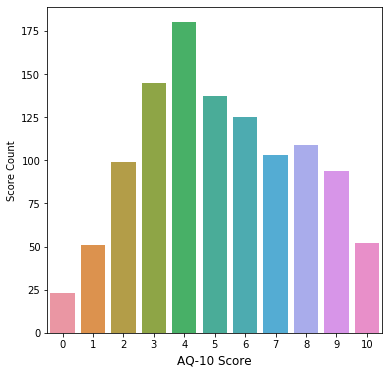

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='Score', data=df)
plt.xlabel("AQ-10 Score", fontsize=12)
plt.ylabel("Score Count")

Text(0, 0.5, 'Gender Count')

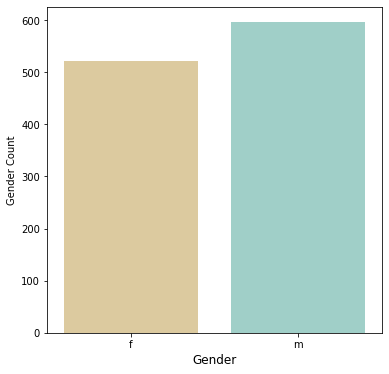

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=df, palette = "BrBG")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Gender Count")

Text(0, 0.5, 'Residence Count')

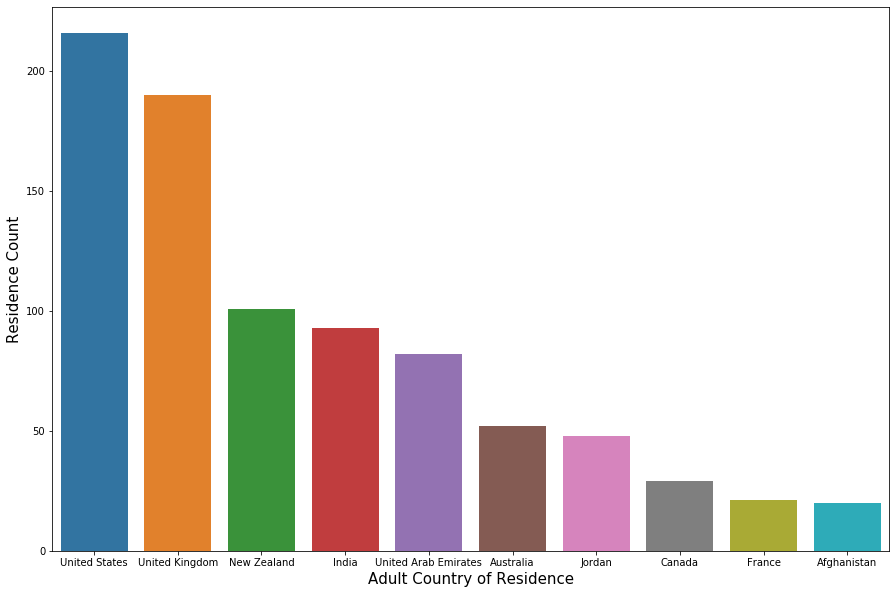

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x='Residence', data=df,order=pd.value_counts(df['Residence']).iloc[:10].index)
plt.xlabel("Adult Country of Residence",fontsize=15)
plt.ylabel("Residence Count",fontsize=15)

Text(0, 0.5, 'Residence Count')

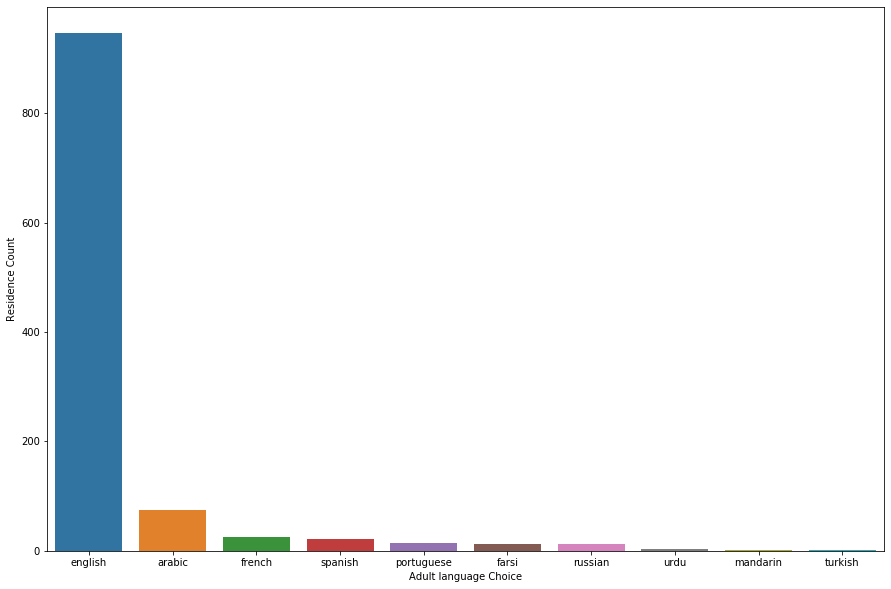

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x='Language', data=df,order=pd.value_counts(df['Language']).iloc[:10].index)
plt.xlabel("Adult language Choice")
plt.ylabel("Residence Count")

Text(0, 0.5, 'Count')

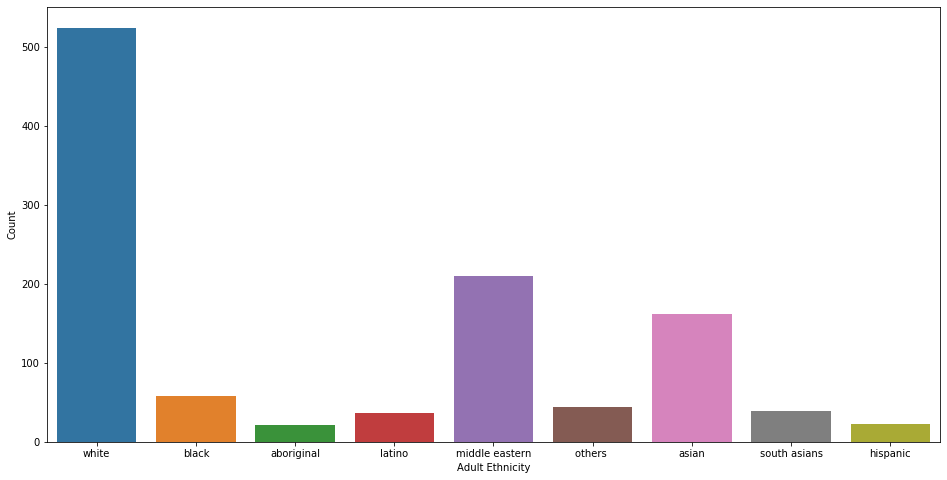

In [39]:
plt.figure(figsize=(16,8))
sns.countplot(x='Ethnicity', data=df)
plt.xlabel("Adult Ethnicity")
plt.ylabel("Count")

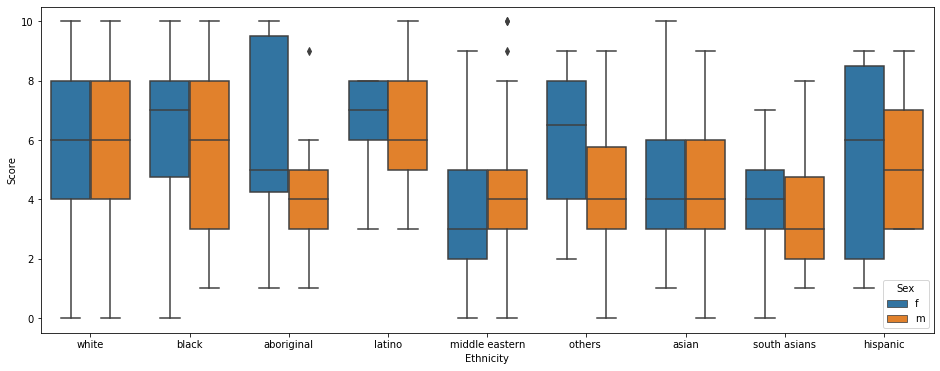

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Ethnicity", y ="Score",hue="Sex",data=df)

In [3]:
#recoding gender
conditions = [
    (df['Sex'] == 'f') ,
     (df['Sex'] != 'f' )]
choices = [1,0]
df['female'] = np.select(conditions, choices, default=np.nan)

conditions = [
    (df['Sex'] == 'f') ,
     (df['Sex'] != 'f' )]
choices = [0,1]
df['male'] = np.select(conditions, choices, default=np.nan)


#recoding for diagnosis threshold
conditions = [
    (df['Class'] == 'YES') ,
     (df['Class'] == 'NO')]
choices = [1,0]
df['Class'] = np.select(conditions, choices, default=np.nan)


#recoding for diagnosis threshold
conditions = [
    (df['Family_ASD'] == 'YES') ,
     (df['Family_ASD'] == 'NO')]
choices = [1,0]
df['Family_ASD'] = np.select(conditions, choices, default=np.nan)

#recoding for white vs non white and asian cohorts
df['white'] = \
   (df['Ethnicity'] == "white") 
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']

In [24]:
statistics.mean(df.female)

0.4669051878354204

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ female:C(Ethnicity)",data = df,family=sm.families.Binomial())

results1 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results1.summary())
print(round(np.exp(results1.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1117
Model:                            GLM   Df Residuals:                     1107
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -661.71
Date:                Mon, 20 Apr 2020   Deviance:                       1323.4
Time:                        13:40:08   Pearson chi2:                 1.12e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ male:C(Ethnicity)",data = df,family=sm.families.Binomial())

results2 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results2.summary())
print(round(np.exp(results2.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1117
Model:                            GLM   Df Residuals:                     1107
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -664.89
Date:                Mon, 20 Apr 2020   Deviance:                       1329.8
Time:                        13:40:27   Pearson chi2:                 1.12e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ C(Ethnicity)",data = df,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1117
Model:                            GLM   Df Residuals:                     1108
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -634.40
Date:                Sun, 19 Apr 2020   Deviance:                       1268.8
Time:                        20:11:11   Pearson chi2:                 1.12e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [24]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Residence,Used_App_Before,Why_taken_the_screening,Score,Language,Class,female,white
0,0,0,0,0,0,0,0,0,0,0,27,f,white,no,Russia,no,NaN,0,russian,0.0,1.0,1
1,1,1,1,1,1,1,1,1,1,1,21,f,white,no,Germany,no,NaN,10,english,1.0,1.0,1
2,1,1,0,1,1,0,0,1,0,0,18,m,black,no,United States,no,29,5,english,0.0,0.0,0
3,1,0,0,0,1,1,1,1,1,1,49,m,black,no,Mexico,no,NaN,7,french,1.0,0.0,0
4,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,Indonesia,no,29,4,english,0.0,0.0,0


In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ white",data = df,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1118
Model:                            GLM   Df Residuals:                     1116
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -668.85
Date:                Wed, 15 Apr 2020   Deviance:                       1337.7
Time:                        07:19:45   Pearson chi2:                 1.12e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2922      0.100    -12.949      0.0

In [31]:
model = glm("Class ~ female",data = df,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1118
Model:                            GLM   Df Residuals:                     1116
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -698.39
Date:                Wed, 15 Apr 2020   Deviance:                       1396.8
Time:                        07:19:47   Pearson chi2:                 1.12e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8941      0.090     -9.907      0.0

In [4]:
df['white'] = \
   (df['Ethnicity'] == "white") 
df.white = df.white.astype(int)

In [8]:
dfmini = df.groupby('white').agg(['mean'])
dfmini

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
white,,,,,,,,,,,,,
0,1175.181818,0.688552,0.415825,0.429293,0.454545,0.478114,0.242424,0.415825,0.651515,0.286195,0.553872,27.858586,4.616162
1,1535.196565,0.797710,0.566794,0.595420,0.633588,0.570611,0.419847,0.475191,0.645038,0.461832,0.666031,32.732824,5.832061


In [9]:
dfmini.to_csv("dfmini.csv")

In [7]:
group1 = df.loc[df['white'] == 1]
#group1.to_csv('adult1.csv')
group2 = df.loc[df['white'] == 0]
#group2.to_csv('adult2.csv')

In [8]:
group1m = group1.loc[df['Sex'] == 'm']
group1m.to_csv('adultwhitemale.csv')

In [9]:
nonewhite = group2
nonewhite.to_csv('adultnonewhite.csv')

In [10]:
whitefemale = group1.loc[df['Sex'] == 'f']
whitefemale.to_csv('adultwhitefemale.csv')

In [6]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')

#recoding gender
conditions = [
    (df['Sex'] == 'f') ,
     (df['Sex'] != 'f' )]
choices = [1,0]
df['female'] = np.select(conditions, choices, default=np.nan)

#recoding for diagnosis threshold
conditions = [
    (df['Class'] == 'YES') ,
     (df['Class'] == 'NO')]
choices = [1,0]
df['Class'] = np.select(conditions, choices, default=np.nan)


#recoding for diagnosis threshold
conditions = [
    (df['Family_ASD'] == 'YES') ,
     (df['Family_ASD'] == 'NO')]
choices = [1,0]
df['Family_ASD'] = np.select(conditions, choices, default=np.nan)

#recoding for white vs non white  cohort
df['white'] = \
   (df['Ethnicity'] == "white") 
df.white = df.white.astype(int)

#recoding for white vs non white male cohort
df['white'] = \
   (df['Ethnicity'] == "white") 
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Ethnicity']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']

In [13]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,white
0,0,0,0,0,0,0,0,0,0,0,27,0,0
1,1,1,1,1,1,1,1,1,1,1,21,10,0
2,1,1,0,1,1,0,0,1,0,0,18,5,0
3,1,0,0,0,1,1,1,1,1,1,49,7,0
4,1,1,1,0,0,0,0,1,0,0,18,4,0


In [14]:
df['white'].value_counts()

0    853
1    265
Name: white, dtype: int64

In [64]:
594 / (594 + 524)

0.5313059033989267

In [25]:
y=df['white']
X=df.drop(['white'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
X_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,female
996,1,1,1,1,1,0,0,0,1,1,28,7,1.0
101,1,0,0,1,1,0,0,0,0,1,20,4,0.0
486,0,0,0,1,0,0,0,0,0,0,52,1,1.0
711,1,0,1,1,1,0,1,1,1,1,26,8,1.0
777,1,0,1,1,1,1,1,1,0,1,25,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0,0,0,1,1,1,1,0,1,1,32,6,1.0
912,1,0,1,0,1,0,0,1,0,0,19,4,0.0
513,1,1,0,1,1,1,0,0,1,1,30,7,1.0
824,1,0,1,1,0,0,0,1,1,1,35,6,1.0


In [26]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = Adam(lr = .0001)


model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(2, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(X_train, pd.get_dummies(y_train), batch_size=20,validation_data=(X_test,pd.get_dummies(y_test)),
               epochs = 1200)  

Train on 838 samples, validate on 280 samples
Epoch 1/1200
838/838 [==============================] - 0s 199us/step - loss: 4.4349 - accuracy: 0.5286 - val_loss: 2.4612 - val_accuracy: 0.5393
Epoch 2/1200
838/838 [==============================] - 0s 60us/step - loss: 2.2043 - accuracy: 0.4916 - val_loss: 2.1007 - val_accuracy: 0.5286
Epoch 3/1200
838/838 [==============================] - 0s 61us/step - loss: 2.0771 - accuracy: 0.5263 - val_loss: 2.0445 - val_accuracy: 0.5321
Epoch 4/1200
838/838 [==============================] - 0s 62us/step - loss: 2.0197 - accuracy: 0.5143 - val_loss: 1.9913 - val_accuracy: 0.5393
Epoch 5/1200
838/838 [==============================] - 0s 63us/step - loss: 1.9684 - accuracy: 0.5382 - val_loss: 1.9397 - val_accuracy: 0.5500
Epoch 6/1200
838/838 [==============================] - 0s 67us/step - loss: 1.9196 - accuracy: 0.5298 - val_loss: 1.8951 - val_accuracy: 0.5286
Epoch 7/1200
838/838 [==============================] - 0s 65us/step - loss: 1.8742

Epoch 57/1200
838/838 [==============================] - 0s 49us/step - loss: 1.0204 - accuracy: 0.6289 - val_loss: 1.0258 - val_accuracy: 0.6357
Epoch 58/1200
838/838 [==============================] - 0s 54us/step - loss: 1.0160 - accuracy: 0.6432 - val_loss: 1.0183 - val_accuracy: 0.6321
Epoch 59/1200
838/838 [==============================] - 0s 51us/step - loss: 1.0120 - accuracy: 0.6456 - val_loss: 1.0203 - val_accuracy: 0.6357
Epoch 60/1200
838/838 [==============================] - 0s 49us/step - loss: 1.0097 - accuracy: 0.6301 - val_loss: 1.0104 - val_accuracy: 0.6393
Epoch 61/1200
838/838 [==============================] - 0s 49us/step - loss: 1.0041 - accuracy: 0.6396 - val_loss: 1.0075 - val_accuracy: 0.6357
Epoch 62/1200
838/838 [==============================] - 0s 50us/step - loss: 1.0024 - accuracy: 0.6563 - val_loss: 1.0071 - val_accuracy: 0.6464
Epoch 63/1200
838/838 [==============================] - 0s 46us/step - loss: 0.9975 - accuracy: 0.6384 - val_loss: 1.0207 -

838/838 [==============================] - 0s 48us/step - loss: 0.8983 - accuracy: 0.6539 - val_loss: 0.9028 - val_accuracy: 0.6286
Epoch 114/1200
838/838 [==============================] - 0s 49us/step - loss: 0.9032 - accuracy: 0.6384 - val_loss: 0.9031 - val_accuracy: 0.6107
Epoch 115/1200
838/838 [==============================] - 0s 46us/step - loss: 0.9078 - accuracy: 0.6468 - val_loss: 0.9197 - val_accuracy: 0.6464
Epoch 116/1200
838/838 [==============================] - 0s 48us/step - loss: 0.9060 - accuracy: 0.6444 - val_loss: 0.8979 - val_accuracy: 0.6571
Epoch 117/1200
838/838 [==============================] - 0s 49us/step - loss: 0.8962 - accuracy: 0.6277 - val_loss: 0.8965 - val_accuracy: 0.6571
Epoch 118/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8917 - accuracy: 0.6563 - val_loss: 0.8980 - val_accuracy: 0.6464
Epoch 119/1200
838/838 [==============================] - 0s 50us/step - loss: 0.8954 - accuracy: 0.6492 - val_loss: 0.8961 - val_acc

Epoch 169/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8453 - accuracy: 0.6527 - val_loss: 0.8467 - val_accuracy: 0.6679
Epoch 170/1200
838/838 [==============================] - 0s 46us/step - loss: 0.8432 - accuracy: 0.6623 - val_loss: 0.8457 - val_accuracy: 0.6679
Epoch 171/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8434 - accuracy: 0.6551 - val_loss: 0.8451 - val_accuracy: 0.6607
Epoch 172/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8450 - accuracy: 0.6396 - val_loss: 0.8544 - val_accuracy: 0.6607
Epoch 173/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8410 - accuracy: 0.6563 - val_loss: 0.8656 - val_accuracy: 0.6500
Epoch 174/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8418 - accuracy: 0.6504 - val_loss: 0.8661 - val_accuracy: 0.6464
Epoch 175/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8416 - accuracy: 0.6492 - val_loss: 0

Epoch 225/1200
838/838 [==============================] - 0s 50us/step - loss: 0.8043 - accuracy: 0.6671 - val_loss: 0.8092 - val_accuracy: 0.6714
Epoch 226/1200
838/838 [==============================] - 0s 49us/step - loss: 0.8079 - accuracy: 0.6504 - val_loss: 0.8083 - val_accuracy: 0.6607
Epoch 227/1200
838/838 [==============================] - 0s 46us/step - loss: 0.8062 - accuracy: 0.6492 - val_loss: 0.8088 - val_accuracy: 0.6500
Epoch 228/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8143 - accuracy: 0.6599 - val_loss: 0.8132 - val_accuracy: 0.6750
Epoch 229/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8028 - accuracy: 0.6623 - val_loss: 0.8084 - val_accuracy: 0.6571
Epoch 230/1200
838/838 [==============================] - 0s 48us/step - loss: 0.8043 - accuracy: 0.6611 - val_loss: 0.8067 - val_accuracy: 0.6750
Epoch 231/1200
838/838 [==============================] - 0s 46us/step - loss: 0.8043 - accuracy: 0.6563 - val_loss: 0

Epoch 281/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7788 - accuracy: 0.6659 - val_loss: 0.7867 - val_accuracy: 0.6536
Epoch 282/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7815 - accuracy: 0.6635 - val_loss: 0.7845 - val_accuracy: 0.6643
Epoch 283/1200
838/838 [==============================] - 0s 45us/step - loss: 0.7781 - accuracy: 0.6659 - val_loss: 0.7923 - val_accuracy: 0.6714
Epoch 284/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7808 - accuracy: 0.6551 - val_loss: 0.7876 - val_accuracy: 0.6607
Epoch 285/1200
838/838 [==============================] - 0s 46us/step - loss: 0.7783 - accuracy: 0.6647 - val_loss: 0.7844 - val_accuracy: 0.6607
Epoch 286/1200
838/838 [==============================] - 0s 49us/step - loss: 0.7773 - accuracy: 0.6599 - val_loss: 0.8286 - val_accuracy: 0.6286
Epoch 287/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7787 - accuracy: 0.6551 - val_loss: 0

Epoch 337/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7656 - accuracy: 0.6516 - val_loss: 0.7923 - val_accuracy: 0.6464
Epoch 338/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7605 - accuracy: 0.6623 - val_loss: 0.7643 - val_accuracy: 0.6536
Epoch 339/1200
838/838 [==============================] - 0s 49us/step - loss: 0.7614 - accuracy: 0.6647 - val_loss: 0.7648 - val_accuracy: 0.6679
Epoch 340/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7635 - accuracy: 0.6432 - val_loss: 0.7639 - val_accuracy: 0.6714
Epoch 341/1200
838/838 [==============================] - 0s 50us/step - loss: 0.7596 - accuracy: 0.6730 - val_loss: 0.7636 - val_accuracy: 0.6536
Epoch 342/1200
838/838 [==============================] - 0s 49us/step - loss: 0.7617 - accuracy: 0.6611 - val_loss: 0.7656 - val_accuracy: 0.6643
Epoch 343/1200
838/838 [==============================] - 0s 47us/step - loss: 0.7588 - accuracy: 0.6623 - val_loss: 0

Epoch 393/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7467 - accuracy: 0.6563 - val_loss: 0.7583 - val_accuracy: 0.6750
Epoch 394/1200
838/838 [==============================] - 0s 46us/step - loss: 0.7440 - accuracy: 0.6611 - val_loss: 0.7489 - val_accuracy: 0.6679
Epoch 395/1200
838/838 [==============================] - 0s 50us/step - loss: 0.7463 - accuracy: 0.6635 - val_loss: 0.7575 - val_accuracy: 0.6714
Epoch 396/1200
838/838 [==============================] - 0s 47us/step - loss: 0.7427 - accuracy: 0.6742 - val_loss: 0.7577 - val_accuracy: 0.6750
Epoch 397/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7412 - accuracy: 0.6754 - val_loss: 0.7565 - val_accuracy: 0.6714
Epoch 398/1200
838/838 [==============================] - 0s 46us/step - loss: 0.7491 - accuracy: 0.6635 - val_loss: 0.7507 - val_accuracy: 0.6607
Epoch 399/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7439 - accuracy: 0.6623 - val_loss: 0

Epoch 449/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7291 - accuracy: 0.6599 - val_loss: 0.7440 - val_accuracy: 0.6679
Epoch 450/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7322 - accuracy: 0.6599 - val_loss: 0.7379 - val_accuracy: 0.6571
Epoch 451/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7302 - accuracy: 0.6695 - val_loss: 0.7412 - val_accuracy: 0.6679
Epoch 452/1200
838/838 [==============================] - 0s 49us/step - loss: 0.7305 - accuracy: 0.6718 - val_loss: 0.7453 - val_accuracy: 0.6750
Epoch 453/1200
838/838 [==============================] - 0s 46us/step - loss: 0.7310 - accuracy: 0.6659 - val_loss: 0.7363 - val_accuracy: 0.6679
Epoch 454/1200
838/838 [==============================] - 0s 51us/step - loss: 0.7280 - accuracy: 0.6730 - val_loss: 0.7364 - val_accuracy: 0.6714
Epoch 455/1200
838/838 [==============================] - 0s 50us/step - loss: 0.7299 - accuracy: 0.6683 - val_loss: 0

Epoch 505/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7195 - accuracy: 0.6611 - val_loss: 0.7267 - val_accuracy: 0.6786
Epoch 506/1200
838/838 [==============================] - 0s 49us/step - loss: 0.7205 - accuracy: 0.6611 - val_loss: 0.7322 - val_accuracy: 0.6607
Epoch 507/1200
838/838 [==============================] - 0s 50us/step - loss: 0.7223 - accuracy: 0.6611 - val_loss: 0.7276 - val_accuracy: 0.6464
Epoch 508/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7182 - accuracy: 0.6635 - val_loss: 0.7329 - val_accuracy: 0.6714
Epoch 509/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7178 - accuracy: 0.6706 - val_loss: 0.7261 - val_accuracy: 0.6643
Epoch 510/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7196 - accuracy: 0.6599 - val_loss: 0.7353 - val_accuracy: 0.6714
Epoch 511/1200
838/838 [==============================] - 0s 49us/step - loss: 0.7334 - accuracy: 0.6456 - val_loss: 0

Epoch 561/1200
838/838 [==============================] - 0s 51us/step - loss: 0.7117 - accuracy: 0.6671 - val_loss: 0.7174 - val_accuracy: 0.6679
Epoch 562/1200
838/838 [==============================] - 0s 50us/step - loss: 0.7160 - accuracy: 0.6587 - val_loss: 0.7177 - val_accuracy: 0.6536
Epoch 563/1200
838/838 [==============================] - 0s 50us/step - loss: 0.7128 - accuracy: 0.6587 - val_loss: 0.7215 - val_accuracy: 0.6643
Epoch 564/1200
838/838 [==============================] - 0s 52us/step - loss: 0.7099 - accuracy: 0.6742 - val_loss: 0.7179 - val_accuracy: 0.6679
Epoch 565/1200
838/838 [==============================] - 0s 49us/step - loss: 0.7095 - accuracy: 0.6623 - val_loss: 0.7166 - val_accuracy: 0.6714
Epoch 566/1200
838/838 [==============================] - 0s 70us/step - loss: 0.7097 - accuracy: 0.6575 - val_loss: 0.7190 - val_accuracy: 0.6643
Epoch 567/1200
838/838 [==============================] - 0s 60us/step - loss: 0.7091 - accuracy: 0.6742 - val_loss: 0

Epoch 617/1200
838/838 [==============================] - 0s 64us/step - loss: 0.7032 - accuracy: 0.6718 - val_loss: 0.7096 - val_accuracy: 0.6643
Epoch 618/1200
838/838 [==============================] - 0s 60us/step - loss: 0.7034 - accuracy: 0.6659 - val_loss: 0.7374 - val_accuracy: 0.6536
Epoch 619/1200
838/838 [==============================] - 0s 79us/step - loss: 0.7032 - accuracy: 0.6671 - val_loss: 0.7357 - val_accuracy: 0.6571
Epoch 620/1200
838/838 [==============================] - 0s 68us/step - loss: 0.7138 - accuracy: 0.6456 - val_loss: 0.7117 - val_accuracy: 0.6500
Epoch 621/1200
838/838 [==============================] - 0s 61us/step - loss: 0.7059 - accuracy: 0.6587 - val_loss: 0.7094 - val_accuracy: 0.6679
Epoch 622/1200
838/838 [==============================] - 0s 50us/step - loss: 0.7028 - accuracy: 0.6671 - val_loss: 0.7133 - val_accuracy: 0.6714
Epoch 623/1200
838/838 [==============================] - 0s 48us/step - loss: 0.7023 - accuracy: 0.6742 - val_loss: 0

Epoch 673/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6965 - accuracy: 0.6671 - val_loss: 0.7029 - val_accuracy: 0.6679
Epoch 674/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6997 - accuracy: 0.6611 - val_loss: 0.7035 - val_accuracy: 0.6679
Epoch 675/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6941 - accuracy: 0.6802 - val_loss: 0.7050 - val_accuracy: 0.6643
Epoch 676/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6960 - accuracy: 0.6706 - val_loss: 0.7111 - val_accuracy: 0.6679
Epoch 677/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6952 - accuracy: 0.6635 - val_loss: 0.7029 - val_accuracy: 0.6679
Epoch 678/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6963 - accuracy: 0.6623 - val_loss: 0.7046 - val_accuracy: 0.6786
Epoch 679/1200
838/838 [==============================] - 0s 49us/step - loss: 0.6936 - accuracy: 0.6730 - val_loss: 0

Epoch 729/1200
838/838 [==============================] - 0s 47us/step - loss: 0.6888 - accuracy: 0.6706 - val_loss: 0.7058 - val_accuracy: 0.6679
Epoch 730/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6887 - accuracy: 0.6790 - val_loss: 0.6981 - val_accuracy: 0.6714
Epoch 731/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6889 - accuracy: 0.6754 - val_loss: 0.7039 - val_accuracy: 0.6643
Epoch 732/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6881 - accuracy: 0.6730 - val_loss: 0.7029 - val_accuracy: 0.6714
Epoch 733/1200
838/838 [==============================] - 0s 52us/step - loss: 0.6886 - accuracy: 0.6647 - val_loss: 0.7051 - val_accuracy: 0.6679
Epoch 734/1200
838/838 [==============================] - 0s 49us/step - loss: 0.6879 - accuracy: 0.6718 - val_loss: 0.7001 - val_accuracy: 0.6750
Epoch 735/1200
838/838 [==============================] - 0s 49us/step - loss: 0.6872 - accuracy: 0.6706 - val_loss: 0

Epoch 785/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6831 - accuracy: 0.6826 - val_loss: 0.6926 - val_accuracy: 0.6643
Epoch 786/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6839 - accuracy: 0.6671 - val_loss: 0.6967 - val_accuracy: 0.6750
Epoch 787/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6804 - accuracy: 0.6527 - val_loss: 0.7187 - val_accuracy: 0.6571
Epoch 788/1200
838/838 [==============================] - 0s 47us/step - loss: 0.6878 - accuracy: 0.6599 - val_loss: 0.6924 - val_accuracy: 0.6643
Epoch 789/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6870 - accuracy: 0.6587 - val_loss: 0.7011 - val_accuracy: 0.6679
Epoch 790/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6850 - accuracy: 0.6599 - val_loss: 0.7134 - val_accuracy: 0.6607
Epoch 791/1200
838/838 [==============================] - 0s 49us/step - loss: 0.6827 - accuracy: 0.6742 - val_loss: 0

Epoch 841/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6792 - accuracy: 0.6706 - val_loss: 0.6968 - val_accuracy: 0.6679
Epoch 842/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6795 - accuracy: 0.6766 - val_loss: 0.6942 - val_accuracy: 0.6643
Epoch 843/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6796 - accuracy: 0.6611 - val_loss: 0.6890 - val_accuracy: 0.6857
Epoch 844/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6786 - accuracy: 0.6647 - val_loss: 0.6921 - val_accuracy: 0.6429
Epoch 845/1200
838/838 [==============================] - 0s 49us/step - loss: 0.6884 - accuracy: 0.6539 - val_loss: 0.6884 - val_accuracy: 0.6679
Epoch 846/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6809 - accuracy: 0.6647 - val_loss: 0.7063 - val_accuracy: 0.6679
Epoch 847/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6787 - accuracy: 0.6742 - val_loss: 0

Epoch 897/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6766 - accuracy: 0.6635 - val_loss: 0.6874 - val_accuracy: 0.6821
Epoch 898/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6752 - accuracy: 0.6754 - val_loss: 0.6841 - val_accuracy: 0.6607
Epoch 899/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6761 - accuracy: 0.6718 - val_loss: 0.6846 - val_accuracy: 0.6571
Epoch 900/1200
838/838 [==============================] - 0s 51us/step - loss: 0.6732 - accuracy: 0.6838 - val_loss: 0.6937 - val_accuracy: 0.6607
Epoch 901/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6750 - accuracy: 0.6695 - val_loss: 0.6848 - val_accuracy: 0.6750
Epoch 902/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6733 - accuracy: 0.6778 - val_loss: 0.6866 - val_accuracy: 0.6821
Epoch 903/1200
838/838 [==============================] - 0s 44us/step - loss: 0.6792 - accuracy: 0.6671 - val_loss: 0

Epoch 953/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6713 - accuracy: 0.6730 - val_loss: 0.6846 - val_accuracy: 0.6750
Epoch 954/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6706 - accuracy: 0.6671 - val_loss: 0.6837 - val_accuracy: 0.6786
Epoch 955/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6728 - accuracy: 0.6647 - val_loss: 0.6901 - val_accuracy: 0.6679
Epoch 956/1200
838/838 [==============================] - ETA: 0s - loss: 0.6299 - accuracy: 0.65 - 0s 46us/step - loss: 0.6694 - accuracy: 0.6802 - val_loss: 0.6811 - val_accuracy: 0.6679
Epoch 957/1200
838/838 [==============================] - 0s 44us/step - loss: 0.6731 - accuracy: 0.6563 - val_loss: 0.6812 - val_accuracy: 0.6571
Epoch 958/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6705 - accuracy: 0.6706 - val_loss: 0.6864 - val_accuracy: 0.6714
Epoch 959/1200
838/838 [==============================] - 0s 46us/step - los

838/838 [==============================] - 0s 46us/step - loss: 0.6635 - accuracy: 0.6683 - val_loss: 0.6757 - val_accuracy: 0.6607
Epoch 1064/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6690 - accuracy: 0.6599 - val_loss: 0.6898 - val_accuracy: 0.6679
Epoch 1065/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6668 - accuracy: 0.6647 - val_loss: 0.6834 - val_accuracy: 0.6679
Epoch 1066/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6671 - accuracy: 0.6659 - val_loss: 0.6981 - val_accuracy: 0.6714
Epoch 1067/1200
838/838 [==============================] - 0s 44us/step - loss: 0.6628 - accuracy: 0.6659 - val_loss: 0.7030 - val_accuracy: 0.6607
Epoch 1068/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6644 - accuracy: 0.6742 - val_loss: 0.6821 - val_accuracy: 0.6714
Epoch 1069/1200
838/838 [==============================] - 0s 47us/step - loss: 0.6628 - accuracy: 0.6766 - val_loss: 0.6748 - v

838/838 [==============================] - 0s 48us/step - loss: 0.6602 - accuracy: 0.6742 - val_loss: 0.6715 - val_accuracy: 0.6750
Epoch 1174/1200
838/838 [==============================] - 0s 48us/step - loss: 0.6576 - accuracy: 0.6766 - val_loss: 0.6712 - val_accuracy: 0.6714
Epoch 1175/1200
838/838 [==============================] - 0s 49us/step - loss: 0.6571 - accuracy: 0.6754 - val_loss: 0.6778 - val_accuracy: 0.6679
Epoch 1176/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6579 - accuracy: 0.6778 - val_loss: 0.6787 - val_accuracy: 0.6679
Epoch 1177/1200
838/838 [==============================] - 0s 46us/step - loss: 0.6576 - accuracy: 0.6730 - val_loss: 0.6874 - val_accuracy: 0.6714
Epoch 1178/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6606 - accuracy: 0.6683 - val_loss: 0.6873 - val_accuracy: 0.6679
Epoch 1179/1200
838/838 [==============================] - 0s 45us/step - loss: 0.6619 - accuracy: 0.6742 - val_loss: 0.6709 - v

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 130       
Total params: 9,346
Trainable params: 9,346
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Does substantially better than model without new terrorism variable

# using predict_classes() for multi-class data to return predicted class index.

prediction_index=model.predict_classes((X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))


model_eval_metrics( y_test,predicted_labels,classification="TRUE")


,accuracy,f1_score,precision,recall
0,0.667857,0.667751,0.674628,0.673418


In [49]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200)

formodel = forest.fit(X_train, y_train)
formodel.score(X_test, y_test)

0.5857142857142857

In [113]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = Adam(lr = .0001)

model = Sequential()
model.add(Dense(50, input_dim=13, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(2, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(X_train, pd.get_dummies(y_train), batch_size=30,validation_data=(X_test,pd.get_dummies(y_test)),
               epochs = 2000)  

Train on 838 samples, validate on 280 samples
Epoch 1/2000
838/838 [==============================] - 0s 188us/step - loss: 3.5494 - accuracy: 0.5286 - val_loss: 2.7250 - val_accuracy: 0.5393
Epoch 2/2000
838/838 [==============================] - 0s 35us/step - loss: 2.2631 - accuracy: 0.5394 - val_loss: 1.9037 - val_accuracy: 0.5679
Epoch 3/2000
838/838 [==============================] - 0s 37us/step - loss: 1.8678 - accuracy: 0.5143 - val_loss: 1.8522 - val_accuracy: 0.4750
Epoch 4/2000
838/838 [==============================] - 0s 36us/step - loss: 1.8242 - accuracy: 0.5143 - val_loss: 1.8077 - val_accuracy: 0.5107
Epoch 5/2000
838/838 [==============================] - 0s 33us/step - loss: 1.7926 - accuracy: 0.5215 - val_loss: 1.7788 - val_accuracy: 0.5179
Epoch 6/2000
838/838 [==============================] - 0s 33us/step - loss: 1.7631 - accuracy: 0.5179 - val_loss: 1.7508 - val_accuracy: 0.5071
Epoch 7/2000
838/838 [==============================] - 0s 32us/step - loss: 1.7361

Epoch 57/2000
838/838 [==============================] - 0s 33us/step - loss: 1.0515 - accuracy: 0.6384 - val_loss: 1.0543 - val_accuracy: 0.6107
Epoch 58/2000
838/838 [==============================] - 0s 34us/step - loss: 1.0526 - accuracy: 0.6265 - val_loss: 1.0478 - val_accuracy: 0.6393
Epoch 59/2000
838/838 [==============================] - 0s 32us/step - loss: 1.0397 - accuracy: 0.6348 - val_loss: 1.0480 - val_accuracy: 0.6500
Epoch 60/2000
838/838 [==============================] - 0s 33us/step - loss: 1.0352 - accuracy: 0.6348 - val_loss: 1.0366 - val_accuracy: 0.6357
Epoch 61/2000
838/838 [==============================] - 0s 33us/step - loss: 1.0329 - accuracy: 0.6169 - val_loss: 1.0326 - val_accuracy: 0.6107
Epoch 62/2000
838/838 [==============================] - 0s 34us/step - loss: 1.0245 - accuracy: 0.6193 - val_loss: 1.0376 - val_accuracy: 0.6321
Epoch 63/2000
838/838 [==============================] - 0s 32us/step - loss: 1.0229 - accuracy: 0.6337 - val_loss: 1.0288 -

838/838 [==============================] - 0s 33us/step - loss: 0.8836 - accuracy: 0.6432 - val_loss: 0.8874 - val_accuracy: 0.6500
Epoch 114/2000
838/838 [==============================] - 0s 33us/step - loss: 0.8839 - accuracy: 0.6432 - val_loss: 0.8872 - val_accuracy: 0.6357
Epoch 115/2000
838/838 [==============================] - 0s 33us/step - loss: 0.8798 - accuracy: 0.6420 - val_loss: 0.8875 - val_accuracy: 0.6393
Epoch 116/2000
838/838 [==============================] - 0s 37us/step - loss: 0.8795 - accuracy: 0.6468 - val_loss: 0.8875 - val_accuracy: 0.6500
Epoch 117/2000
838/838 [==============================] - 0s 32us/step - loss: 0.8760 - accuracy: 0.6527 - val_loss: 0.8836 - val_accuracy: 0.6357
Epoch 118/2000
838/838 [==============================] - 0s 33us/step - loss: 0.8755 - accuracy: 0.6551 - val_loss: 0.8849 - val_accuracy: 0.6500
Epoch 119/2000
838/838 [==============================] - 0s 33us/step - loss: 0.8729 - accuracy: 0.6504 - val_loss: 0.8801 - val_acc

Epoch 169/2000
838/838 [==============================] - 0s 40us/step - loss: 0.8343 - accuracy: 0.6587 - val_loss: 0.8431 - val_accuracy: 0.6107
Epoch 170/2000
838/838 [==============================] - 0s 37us/step - loss: 0.8363 - accuracy: 0.6539 - val_loss: 0.8392 - val_accuracy: 0.6500
Epoch 171/2000
838/838 [==============================] - 0s 31us/step - loss: 0.8332 - accuracy: 0.6444 - val_loss: 0.8428 - val_accuracy: 0.6607
Epoch 172/2000
838/838 [==============================] - 0s 33us/step - loss: 0.8325 - accuracy: 0.6456 - val_loss: 0.8461 - val_accuracy: 0.6643
Epoch 173/2000
838/838 [==============================] - 0s 31us/step - loss: 0.8315 - accuracy: 0.6551 - val_loss: 0.8440 - val_accuracy: 0.6643
Epoch 174/2000
838/838 [==============================] - 0s 33us/step - loss: 0.8284 - accuracy: 0.6539 - val_loss: 0.8364 - val_accuracy: 0.6464
Epoch 175/2000
838/838 [==============================] - 0s 33us/step - loss: 0.8301 - accuracy: 0.6444 - val_loss: 0

Epoch 225/2000
838/838 [==============================] - 0s 32us/step - loss: 0.8037 - accuracy: 0.6492 - val_loss: 0.8247 - val_accuracy: 0.6500
Epoch 226/2000
838/838 [==============================] - 0s 35us/step - loss: 0.8038 - accuracy: 0.6575 - val_loss: 0.8170 - val_accuracy: 0.6571
Epoch 227/2000
838/838 [==============================] - 0s 32us/step - loss: 0.8021 - accuracy: 0.6587 - val_loss: 0.8104 - val_accuracy: 0.6500
Epoch 228/2000
838/838 [==============================] - 0s 34us/step - loss: 0.8018 - accuracy: 0.6563 - val_loss: 0.8140 - val_accuracy: 0.6536
Epoch 229/2000
838/838 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.60 - 0s 35us/step - loss: 0.8016 - accuracy: 0.6587 - val_loss: 0.8084 - val_accuracy: 0.6536
Epoch 230/2000
838/838 [==============================] - 0s 34us/step - loss: 0.8035 - accuracy: 0.6468 - val_loss: 0.8125 - val_accuracy: 0.6500
Epoch 231/2000
838/838 [==============================] - 0s 33us/step - los

838/838 [==============================] - 0s 36us/step - loss: 0.7683 - accuracy: 0.6539 - val_loss: 0.7752 - val_accuracy: 0.6571
Epoch 336/2000
838/838 [==============================] - 0s 37us/step - loss: 0.7665 - accuracy: 0.6599 - val_loss: 0.7800 - val_accuracy: 0.6679
Epoch 337/2000
838/838 [==============================] - 0s 37us/step - loss: 0.7686 - accuracy: 0.6587 - val_loss: 0.7841 - val_accuracy: 0.6536
Epoch 338/2000
838/838 [==============================] - 0s 33us/step - loss: 0.7682 - accuracy: 0.6659 - val_loss: 0.7750 - val_accuracy: 0.6536
Epoch 339/2000
838/838 [==============================] - 0s 33us/step - loss: 0.7660 - accuracy: 0.6611 - val_loss: 0.7744 - val_accuracy: 0.6500
Epoch 340/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7660 - accuracy: 0.6563 - val_loss: 0.8015 - val_accuracy: 0.6643
Epoch 341/2000
838/838 [==============================] - 0s 33us/step - loss: 0.7672 - accuracy: 0.6551 - val_loss: 0.7743 - val_acc

Epoch 446/2000
838/838 [==============================] - 0s 33us/step - loss: 0.7474 - accuracy: 0.6563 - val_loss: 0.7550 - val_accuracy: 0.6536
Epoch 447/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7432 - accuracy: 0.6611 - val_loss: 0.7608 - val_accuracy: 0.6571
Epoch 448/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7443 - accuracy: 0.6766 - val_loss: 0.7544 - val_accuracy: 0.6536
Epoch 449/2000
838/838 [==============================] - 0s 33us/step - loss: 0.7439 - accuracy: 0.6647 - val_loss: 0.7535 - val_accuracy: 0.6571
Epoch 450/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7439 - accuracy: 0.6742 - val_loss: 0.7633 - val_accuracy: 0.6500
Epoch 451/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7449 - accuracy: 0.6575 - val_loss: 0.7536 - val_accuracy: 0.6643
Epoch 452/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7444 - accuracy: 0.6635 - val_loss: 0

Epoch 502/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7363 - accuracy: 0.6516 - val_loss: 0.7444 - val_accuracy: 0.6571
Epoch 503/2000
838/838 [==============================] - 0s 33us/step - loss: 0.7343 - accuracy: 0.6623 - val_loss: 0.7564 - val_accuracy: 0.6643
Epoch 504/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7371 - accuracy: 0.6587 - val_loss: 0.7442 - val_accuracy: 0.6607
Epoch 505/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7351 - accuracy: 0.6587 - val_loss: 0.7544 - val_accuracy: 0.6607
Epoch 506/2000
838/838 [==============================] - 0s 34us/step - loss: 0.7346 - accuracy: 0.6706 - val_loss: 0.7493 - val_accuracy: 0.6500
Epoch 507/2000
838/838 [==============================] - 0s 34us/step - loss: 0.7352 - accuracy: 0.6635 - val_loss: 0.7486 - val_accuracy: 0.6536
Epoch 508/2000
838/838 [==============================] - 0s 34us/step - loss: 0.7343 - accuracy: 0.6706 - val_loss: 0

838/838 [==============================] - 0s 37us/step - loss: 0.7239 - accuracy: 0.6551 - val_loss: 0.7365 - val_accuracy: 0.6571
Epoch 613/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7178 - accuracy: 0.6730 - val_loss: 0.7294 - val_accuracy: 0.6536
Epoch 614/2000
838/838 [==============================] - 0s 34us/step - loss: 0.7228 - accuracy: 0.6599 - val_loss: 0.7294 - val_accuracy: 0.6536
Epoch 615/2000
838/838 [==============================] - 0s 37us/step - loss: 0.7215 - accuracy: 0.6563 - val_loss: 0.7304 - val_accuracy: 0.6679
Epoch 616/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7185 - accuracy: 0.6706 - val_loss: 0.7324 - val_accuracy: 0.6643
Epoch 617/2000
838/838 [==============================] - 0s 42us/step - loss: 0.7192 - accuracy: 0.6659 - val_loss: 0.7364 - val_accuracy: 0.6607
Epoch 618/2000
838/838 [==============================] - 0s 39us/step - loss: 0.7195 - accuracy: 0.6695 - val_loss: 0.7333 - val_acc

838/838 [==============================] - 0s 33us/step - loss: 0.7083 - accuracy: 0.6706 - val_loss: 0.7242 - val_accuracy: 0.6500
Epoch 723/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7076 - accuracy: 0.6683 - val_loss: 0.7241 - val_accuracy: 0.6536
Epoch 724/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7071 - accuracy: 0.6766 - val_loss: 0.7180 - val_accuracy: 0.6536
Epoch 725/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7118 - accuracy: 0.6623 - val_loss: 0.7273 - val_accuracy: 0.6571
Epoch 726/2000
838/838 [==============================] - 0s 37us/step - loss: 0.7073 - accuracy: 0.6647 - val_loss: 0.7225 - val_accuracy: 0.6500
Epoch 727/2000
838/838 [==============================] - 0s 37us/step - loss: 0.7072 - accuracy: 0.6766 - val_loss: 0.7209 - val_accuracy: 0.6750
Epoch 728/2000
838/838 [==============================] - 0s 34us/step - loss: 0.7067 - accuracy: 0.6575 - val_loss: 0.7395 - val_acc

Epoch 778/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7105 - accuracy: 0.6516 - val_loss: 0.7263 - val_accuracy: 0.6643
Epoch 779/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7016 - accuracy: 0.6683 - val_loss: 0.7132 - val_accuracy: 0.6536
Epoch 780/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7025 - accuracy: 0.6730 - val_loss: 0.7153 - val_accuracy: 0.6750
Epoch 781/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7020 - accuracy: 0.6730 - val_loss: 0.7156 - val_accuracy: 0.6714
Epoch 782/2000
838/838 [==============================] - 0s 36us/step - loss: 0.7013 - accuracy: 0.6706 - val_loss: 0.7305 - val_accuracy: 0.6714
Epoch 783/2000
838/838 [==============================] - 0s 33us/step - loss: 0.7061 - accuracy: 0.6647 - val_loss: 0.7151 - val_accuracy: 0.6750
Epoch 784/2000
838/838 [==============================] - 0s 35us/step - loss: 0.7043 - accuracy: 0.6587 - val_loss: 0

Epoch 834/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6983 - accuracy: 0.6587 - val_loss: 0.7093 - val_accuracy: 0.6464
Epoch 835/2000
838/838 [==============================] - 0s 34us/step - loss: 0.7007 - accuracy: 0.6659 - val_loss: 0.7087 - val_accuracy: 0.6500
Epoch 836/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6981 - accuracy: 0.6706 - val_loss: 0.7147 - val_accuracy: 0.6464
Epoch 837/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6991 - accuracy: 0.6659 - val_loss: 0.7148 - val_accuracy: 0.6500
Epoch 838/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6975 - accuracy: 0.6706 - val_loss: 0.7210 - val_accuracy: 0.6679
Epoch 839/2000
838/838 [==============================] - 0s 34us/step - loss: 0.7001 - accuracy: 0.6635 - val_loss: 0.7114 - val_accuracy: 0.6750
Epoch 840/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6975 - accuracy: 0.6730 - val_loss: 0

Epoch 945/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6904 - accuracy: 0.6599 - val_loss: 0.7043 - val_accuracy: 0.6786
Epoch 946/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6914 - accuracy: 0.6659 - val_loss: 0.7002 - val_accuracy: 0.6464
Epoch 947/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6896 - accuracy: 0.6671 - val_loss: 0.7031 - val_accuracy: 0.6750
Epoch 948/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6889 - accuracy: 0.6623 - val_loss: 0.7007 - val_accuracy: 0.6500
Epoch 949/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6959 - accuracy: 0.6408 - val_loss: 0.7131 - val_accuracy: 0.6679
Epoch 950/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6905 - accuracy: 0.6647 - val_loss: 0.7105 - val_accuracy: 0.6607
Epoch 951/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6890 - accuracy: 0.6695 - val_loss: 0

Epoch 1001/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6866 - accuracy: 0.6671 - val_loss: 0.7000 - val_accuracy: 0.6786
Epoch 1002/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6862 - accuracy: 0.6659 - val_loss: 0.6978 - val_accuracy: 0.6679
Epoch 1003/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6852 - accuracy: 0.6718 - val_loss: 0.7020 - val_accuracy: 0.6643
Epoch 1004/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6880 - accuracy: 0.6647 - val_loss: 0.7018 - val_accuracy: 0.6643
Epoch 1005/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6854 - accuracy: 0.6766 - val_loss: 0.6972 - val_accuracy: 0.6607
Epoch 1006/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6860 - accuracy: 0.6599 - val_loss: 0.6984 - val_accuracy: 0.6750
Epoch 1007/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6859 - accuracy: 0.6766 - val_

838/838 [==============================] - 0s 34us/step - loss: 0.6781 - accuracy: 0.6683 - val_loss: 0.7003 - val_accuracy: 0.6714
Epoch 1112/2000
838/838 [==============================] - 0s 37us/step - loss: 0.6803 - accuracy: 0.6599 - val_loss: 0.6908 - val_accuracy: 0.6536
Epoch 1113/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6789 - accuracy: 0.6766 - val_loss: 0.6939 - val_accuracy: 0.6786
Epoch 1114/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6811 - accuracy: 0.6695 - val_loss: 0.6928 - val_accuracy: 0.6750
Epoch 1115/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6800 - accuracy: 0.6718 - val_loss: 0.6905 - val_accuracy: 0.6500
Epoch 1116/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6790 - accuracy: 0.6730 - val_loss: 0.6982 - val_accuracy: 0.6643
Epoch 1117/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6790 - accuracy: 0.6742 - val_loss: 0.6942 - v

838/838 [==============================] - 0s 33us/step - loss: 0.6785 - accuracy: 0.6587 - val_loss: 0.6886 - val_accuracy: 0.6786
Epoch 1222/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6728 - accuracy: 0.6730 - val_loss: 0.6874 - val_accuracy: 0.6714
Epoch 1223/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6754 - accuracy: 0.6695 - val_loss: 0.6857 - val_accuracy: 0.6679
Epoch 1224/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6722 - accuracy: 0.6754 - val_loss: 0.6935 - val_accuracy: 0.6607
Epoch 1225/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6760 - accuracy: 0.6706 - val_loss: 0.6890 - val_accuracy: 0.6857
Epoch 1226/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6751 - accuracy: 0.6695 - val_loss: 0.6878 - val_accuracy: 0.6750
Epoch 1227/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6734 - accuracy: 0.6647 - val_loss: 0.6946 - v

838/838 [==============================] - 0s 34us/step - loss: 0.6694 - accuracy: 0.6659 - val_loss: 0.6850 - val_accuracy: 0.6857
Epoch 1332/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6686 - accuracy: 0.6706 - val_loss: 0.6897 - val_accuracy: 0.6571
Epoch 1333/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6680 - accuracy: 0.6754 - val_loss: 0.6869 - val_accuracy: 0.6786
Epoch 1334/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6669 - accuracy: 0.6623 - val_loss: 0.6934 - val_accuracy: 0.6571
Epoch 1335/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6692 - accuracy: 0.6635 - val_loss: 0.6841 - val_accuracy: 0.6857
Epoch 1336/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6681 - accuracy: 0.6778 - val_loss: 0.6820 - val_accuracy: 0.6679
Epoch 1337/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6676 - accuracy: 0.6706 - val_loss: 0.6852 - v

838/838 [==============================] - 0s 36us/step - loss: 0.6644 - accuracy: 0.6659 - val_loss: 0.6874 - val_accuracy: 0.6607
Epoch 1442/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6640 - accuracy: 0.6802 - val_loss: 0.6815 - val_accuracy: 0.6786
Epoch 1443/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6623 - accuracy: 0.6718 - val_loss: 0.6853 - val_accuracy: 0.6536
Epoch 1444/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6632 - accuracy: 0.6802 - val_loss: 0.6779 - val_accuracy: 0.6714
Epoch 1445/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6623 - accuracy: 0.6647 - val_loss: 0.6859 - val_accuracy: 0.6571
Epoch 1446/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6627 - accuracy: 0.6706 - val_loss: 0.6847 - val_accuracy: 0.6643
Epoch 1447/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6636 - accuracy: 0.6647 - val_loss: 0.6762 - v

838/838 [==============================] - 0s 37us/step - loss: 0.6601 - accuracy: 0.6718 - val_loss: 0.6815 - val_accuracy: 0.6536
Epoch 1552/2000
838/838 [==============================] - 0s 37us/step - loss: 0.6579 - accuracy: 0.6742 - val_loss: 0.6738 - val_accuracy: 0.6786
Epoch 1553/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6568 - accuracy: 0.6742 - val_loss: 0.6922 - val_accuracy: 0.6679
Epoch 1554/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6603 - accuracy: 0.6754 - val_loss: 0.6729 - val_accuracy: 0.6786
Epoch 1555/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6600 - accuracy: 0.6683 - val_loss: 0.6735 - val_accuracy: 0.6750
Epoch 1556/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6583 - accuracy: 0.6695 - val_loss: 0.6814 - val_accuracy: 0.6643
Epoch 1557/2000
838/838 [==============================] - 0s 38us/step - loss: 0.6597 - accuracy: 0.6730 - val_loss: 0.6916 - v

838/838 [==============================] - 0s 35us/step - loss: 0.6560 - accuracy: 0.6730 - val_loss: 0.6761 - val_accuracy: 0.6714
Epoch 1662/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6544 - accuracy: 0.6742 - val_loss: 0.6729 - val_accuracy: 0.6857
Epoch 1663/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6561 - accuracy: 0.6695 - val_loss: 0.6776 - val_accuracy: 0.6607
Epoch 1664/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6538 - accuracy: 0.6814 - val_loss: 0.6720 - val_accuracy: 0.6893
Epoch 1665/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6553 - accuracy: 0.6790 - val_loss: 0.6826 - val_accuracy: 0.6607
Epoch 1666/2000
838/838 [==============================] - 0s 34us/step - loss: 0.6546 - accuracy: 0.6718 - val_loss: 0.6746 - val_accuracy: 0.6750
Epoch 1667/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6565 - accuracy: 0.6635 - val_loss: 0.6703 - v

838/838 [==============================] - 0s 35us/step - loss: 0.6520 - accuracy: 0.6802 - val_loss: 0.6665 - val_accuracy: 0.6607
Epoch 1772/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6514 - accuracy: 0.6742 - val_loss: 0.6897 - val_accuracy: 0.6714
Epoch 1773/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6507 - accuracy: 0.6718 - val_loss: 0.6689 - val_accuracy: 0.6821
Epoch 1774/2000
838/838 [==============================] - ETA: 0s - loss: 0.6089 - accuracy: 0.63 - 0s 37us/step - loss: 0.6507 - accuracy: 0.6766 - val_loss: 0.6679 - val_accuracy: 0.6857
Epoch 1775/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6529 - accuracy: 0.6790 - val_loss: 0.6711 - val_accuracy: 0.6893
Epoch 1776/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6504 - accuracy: 0.6778 - val_loss: 0.6731 - val_accuracy: 0.6750
Epoch 1777/2000
838/838 [==============================] - 0s 37us/step - loss: 0.6504

Epoch 1826/2000
838/838 [==============================] - 0s 37us/step - loss: 0.6493 - accuracy: 0.6706 - val_loss: 0.6677 - val_accuracy: 0.6929
Epoch 1827/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6488 - accuracy: 0.6766 - val_loss: 0.6703 - val_accuracy: 0.6821
Epoch 1828/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6529 - accuracy: 0.6563 - val_loss: 0.6998 - val_accuracy: 0.6393
Epoch 1829/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6530 - accuracy: 0.6695 - val_loss: 0.6655 - val_accuracy: 0.6500
Epoch 1830/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6501 - accuracy: 0.6718 - val_loss: 0.6691 - val_accuracy: 0.6893
Epoch 1831/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6504 - accuracy: 0.6695 - val_loss: 0.6749 - val_accuracy: 0.6679
Epoch 1832/2000
838/838 [==============================] - 0s 33us/step - loss: 0.6488 - accuracy: 0.6802 - val_

838/838 [==============================] - 0s 35us/step - loss: 0.6448 - accuracy: 0.6826 - val_loss: 0.6664 - val_accuracy: 0.6786
Epoch 1937/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6454 - accuracy: 0.6790 - val_loss: 0.6717 - val_accuracy: 0.6786
Epoch 1938/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6455 - accuracy: 0.6790 - val_loss: 0.6695 - val_accuracy: 0.6786
Epoch 1939/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6468 - accuracy: 0.6754 - val_loss: 0.6734 - val_accuracy: 0.6679
Epoch 1940/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6491 - accuracy: 0.6778 - val_loss: 0.6868 - val_accuracy: 0.6714
Epoch 1941/2000
838/838 [==============================] - 0s 35us/step - loss: 0.6467 - accuracy: 0.6730 - val_loss: 0.6751 - val_accuracy: 0.6571
Epoch 1942/2000
838/838 [==============================] - 0s 36us/step - loss: 0.6513 - accuracy: 0.6575 - val_loss: 0.6646 - v

In [114]:
# Does substantially better than model without new terrorism variable

# using predict_classes() for multi-class data to return predicted class index.

prediction_index=model.predict_classes((X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))

# load model_eval_metrics() function into our session to calculate metrics
a

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall
0,0.689286,0.688964,0.689886,0.691026


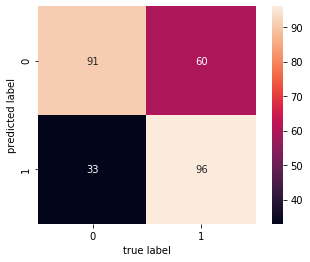

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [35]:
dfc = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')

In [28]:
dfc.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Score,Sex,Ethnicity,Jaundice,Family_ASD,Who_completed_the_test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [52]:
dfc.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_ASD',
       'Who_completed_the_test', 'Class', 'female', 'male', 'white'],
      dtype='object')

In [14]:
statistics.stdev(dfc.Score)

2.9073040100321994

Text(0, 0.5, 'Score Count')

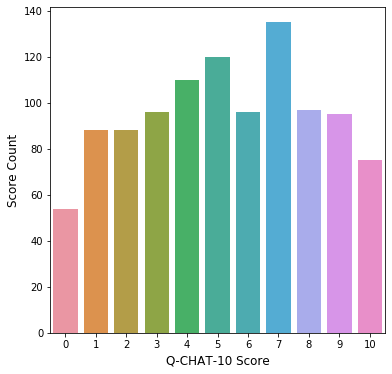

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='Score', data=dfc)
plt.xlabel("Q-CHAT-10 Score", fontsize=12)
plt.ylabel("Score Count", fontsize=12)

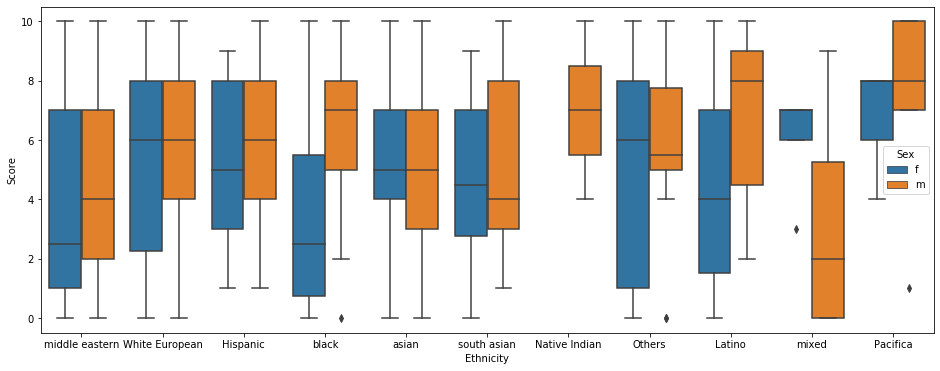

In [29]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Ethnicity", y ="Score",hue="Sex",data=dfc)

In [30]:
dfc.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_ASD',
       'Who_completed_the_test', 'Class'],
      dtype='object')

Text(0, 0.5, 'Gender Count')

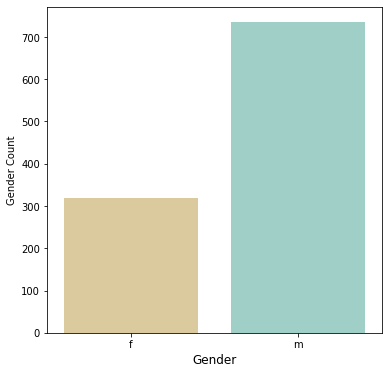

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=dfc, palette = "BrBG")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Gender Count")

In [44]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')

#recoding gender
conditions = [
    (dfc1['Sex'] == 'f') ,
     (dfc1['Sex'] != 'f' )]
choices = [1,0]
dfc1['female'] = np.select(conditions, choices, default=np.nan)

#recoding gender
conditions = [
    (dfc1['Sex'] == 'm') ,
     (dfc1['Sex'] != 'm' )]
choices = [1,0]
dfc1['male'] = np.select(conditions, choices, default=np.nan)




#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   (dfc1['Ethnicity'] == "White European") 
dfc1.white = dfc1.white.astype(int)

#recoding jaundice
conditions = [
    (dfc1['Jaundice'] == 'yes') ,
     (dfc1['Jaundice'] == 'no' )]
choices = [1,0]
dfc1['Jaundice'] = np.select(conditions, choices, default=np.nan)

conditions = [
    (dfc1['Class'] == 'Yes') ,
     (dfc1['Class'] == 'No')]
choices = [1,0]
dfc1['Class'] = np.select(conditions, choices, default=np.nan)
 
#recoding family
conditions = [
    (dfc1['Family_ASD'] == 'yes') ,
     (dfc1['Family_ASD'] == 'no' )]
choices = [1,0]
dfc1['Family_ASD'] = np.select(conditions, choices, default=np.nan)


In [20]:
statistics.mean(dfc1.female)

0.3026565464895636

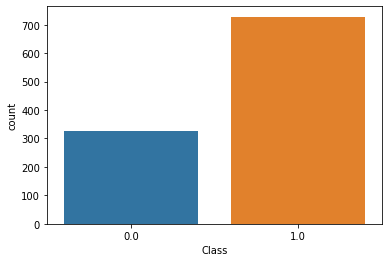

In [14]:
sns.countplot(x='Class', data=dfc1)

In [30]:
#recoding for white vs non white and asian cohorts
dfc['white'] = \
   (dfc['Ethnicity'] == "White European") 
dfc.white = dfc.white.astype(int)

In [31]:
dfc

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Score,Sex,Ethnicity,Jaundice,Family_ASD,Who_completed_the_test,Class,white
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No,0
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes,1
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes,0
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes,0
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No,1
1050,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes,0
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes,0
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No,1


In [67]:
dfcmini = dfc.groupby('white').agg(['mean'])
dfcmini

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Score
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
white,,,,,,,,,,,,
0,0.5264,0.4181,0.3875,0.4861,0.5042,0.5431,0.6250,0.4542,0.4667,0.5681,28.1042,4.9792
1,0.6437,0.5150,0.4311,0.5689,0.5689,0.6497,0.7036,0.4701,0.5389,0.6257,27.3563,5.7156


In [19]:
dfcmini.to_csv('dfcmini.csv') 

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ white",data = dfc1,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1054
Model:                            GLM   Df Residuals:                     1052
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -648.03
Date:                Sun, 12 Apr 2020   Deviance:                       1296.1
Time:                        19:52:37   Pearson chi2:                 1.05e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6807      0.079      8.628      0.0

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import glm


model = glm("Class ~ female:C(Ethnicity)",data = dfc1,family=sm.families.Binomial())

results4 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results4.summary())
print(round(np.exp(results4.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1054
Model:                            GLM   Df Residuals:                     1043
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -628.27
Date:                Tue, 21 Apr 2020   Deviance:                       1256.5
Time:                        18:02:14   Pearson chi2:                 1.05e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import glm


model = glm("Class ~ male:C(Ethnicity)",data = dfc1,family=sm.families.Binomial())

results4 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results4.summary())
print(round(np.exp(results4.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1008
Model:                            GLM   Df Residuals:                      999
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -609.45
Date:                Tue, 21 Apr 2020   Deviance:                       1218.9
Time:                        17:38:14   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Text(0, 0.5, 'Ethnicty Count')

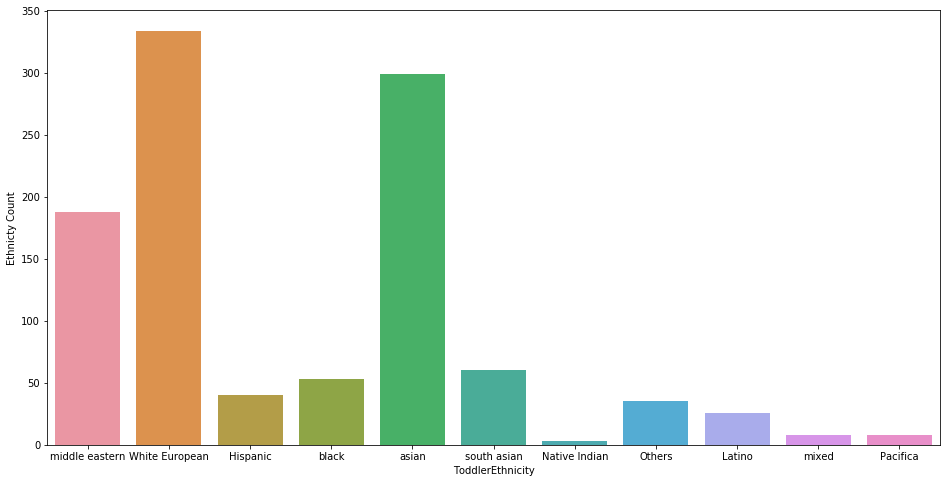

In [37]:
+

In [198]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')

#recoding gender
conditions = [
    (dfc1['Sex'] == 'f') ,
     (dfc1['Sex'] != 'f' )]
choices = [1,0]
dfc1['female'] = np.select(conditions, choices, default=np.nan)


#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   (dfc1['Ethnicity'] == "White European") 
dfc1.white = dfc1.white.astype(int)

conditions = [
    (dfc1['Class'] == 'Yes') ,
     (dfc1['Class'] == 'No')]
choices = [1,0]
dfc1['Class'] = np.select(conditions, choices, default=np.nan)
 

#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Ethnicity']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']

In [99]:
dfc1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Score,female,white
0,0,0,0,0,0,0,1,1,0,1,28,3,1.0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,0.0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,0.0,0
3,1,1,1,1,1,1,1,1,1,1,24,10,0.0,0
4,1,1,0,1,1,1,1,1,1,1,20,9,1.0,1


In [17]:
group1 = dfc.loc[dfc['white'] == 1]
#group1.to_csv('toddler1.csv')
group2 = dfc.loc[dfc['white'] == 0]
#group2.to_csv('toddler2.csv')

In [18]:
group1whitemale = group1.loc[dfc['Sex'] == 'm']
group1whitemale.to_csv("toddlerwhitemale.csv")

In [19]:
nonewhite = group2
nonewhite.to_csv("toddlernonewhite.csv")

In [20]:
group1whitefemale = group1.loc[dfc['Sex'] == 'f']
group1whitefemale.to_csv("toddlerwhitefemale.csv")

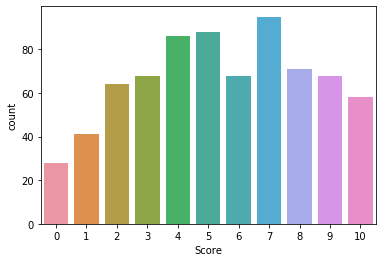

In [33]:
sns.countplot(x='Score', data=group1whitemale)

In [25]:
groupallnonwhitemale.to_csv('toddlernonewhiteall.csv')

In [16]:
dfc.Sex.value_counts()

m    735
f    319
Name: Sex, dtype: int64

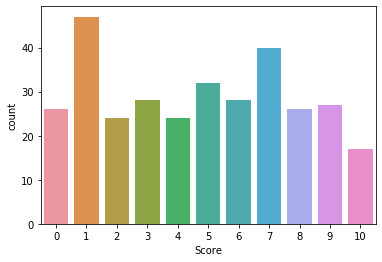

In [31]:
sns.countplot(x='Score', data=groupallnonwhitemale)

In [101]:
print(X_train.shape)
print(y_train.shape)

(790, 13)
(790,)


In [20]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   ((dfc1['Ethnicity'] == "White European")  & (dfc1['Sex'] == 'm'))
dfc1.white = dfc1.white.astype(int)


#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Ethnicity']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

y=dfc1['white']
X=dfc1.drop(['white'],axis=1)

from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE( sampling_strategy='auto')
sm_X, sm_y= smote.fit_sample(X_train, y_train)

In [33]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .00001, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Dense(70, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(2, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(sm_X, pd.get_dummies(sm_y), batch_size=20,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 5000, verbose=1, callbacks=[es,mc])


Train on 1270 samples, validate on 280 samples
Epoch 1/5000
1270/1270 [==============================] - 0s 179us/step - loss: 3.2520 - accuracy: 0.5118 - val_loss: 3.1246 - val_accuracy: 0.2393
Epoch 2/5000
1270/1270 [==============================] - 0s 60us/step - loss: 3.2146 - accuracy: 0.5118 - val_loss: 3.0928 - val_accuracy: 0.2393
Epoch 3/5000
1270/1270 [==============================] - 0s 65us/step - loss: 3.1969 - accuracy: 0.5047 - val_loss: 3.0657 - val_accuracy: 0.2500
Epoch 4/5000
  20/1270 [..............................] - ETA: 0s - loss: 3.2958 - accuracy: 0.3500

C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1270/1270 [==============================] - 0s 57us/step - loss: 3.1615 - accuracy: 0.5071 - val_loss: 3.0432 - val_accuracy: 0.2893
Epoch 5/5000
1270/1270 [==============================] - 0s 57us/step - loss: 3.1347 - accuracy: 0.4921 - val_loss: 3.0248 - val_accuracy: 0.3179
Epoch 6/5000
1270/1270 [==============================] - 0s 57us/step - loss: 3.1674 - accuracy: 0.4913 - val_loss: 3.0077 - val_accuracy: 0.4036
Epoch 7/5000
1270/1270 [==============================] - 0s 57us/step - loss: 3.1182 - accuracy: 0.5031 - val_loss: 2.9942 - val_accuracy: 0.4607
Epoch 8/5000
1270/1270 [==============================] - 0s 56us/step - loss: 3.0935 - accuracy: 0.5220 - val_loss: 2.9822 - val_accuracy: 0.5179
Epoch 9/5000
1270/1270 [==============================] - 0s 59us/step - loss: 3.0991 - accuracy: 0.5055 - val_loss: 2.9721 - val_accuracy: 0.5964
Epoch 10/5000
1270/1270 [==============================] - 0s 55us/step - loss: 3.0738 - accuracy: 0.5094 - val_loss: 2.9640 - val_

1270/1270 [==============================] - 0s 58us/step - loss: 2.9219 - accuracy: 0.5465 - val_loss: 2.8743 - val_accuracy: 0.7821
Epoch 115/5000
1270/1270 [==============================] - 0s 57us/step - loss: 2.9451 - accuracy: 0.4984 - val_loss: 2.8740 - val_accuracy: 0.7821
Epoch 116/5000
1270/1270 [==============================] - 0s 59us/step - loss: 2.9387 - accuracy: 0.5087 - val_loss: 2.8737 - val_accuracy: 0.7821
Epoch 117/5000
1270/1270 [==============================] - 0s 57us/step - loss: 2.9257 - accuracy: 0.5268 - val_loss: 2.8730 - val_accuracy: 0.7821
Epoch 118/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.9416 - accuracy: 0.4811 - val_loss: 2.8725 - val_accuracy: 0.7821
Epoch 119/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.9351 - accuracy: 0.5276 - val_loss: 2.8718 - val_accuracy: 0.7821
Epoch 120/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.9234 - accuracy: 0.5260 - val_loss: 2.

1270/1270 [==============================] - 0s 56us/step - loss: 2.8955 - accuracy: 0.5386 - val_loss: 2.8471 - val_accuracy: 0.7750
Epoch 170/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.8939 - accuracy: 0.5228 - val_loss: 2.8463 - val_accuracy: 0.7750
Epoch 171/5000
1270/1270 [==============================] - 0s 57us/step - loss: 2.8976 - accuracy: 0.5252 - val_loss: 2.8458 - val_accuracy: 0.7750
Epoch 172/5000
1270/1270 [==============================] - 0s 57us/step - loss: 2.8937 - accuracy: 0.5252 - val_loss: 2.8453 - val_accuracy: 0.7750
Epoch 173/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.8825 - accuracy: 0.5449 - val_loss: 2.8448 - val_accuracy: 0.7750
Epoch 174/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.8873 - accuracy: 0.5307 - val_loss: 2.8446 - val_accuracy: 0.7750
Epoch 175/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.8922 - accuracy: 0.5386 - val_loss: 2.

1270/1270 [==============================] - 0s 60us/step - loss: 2.8560 - accuracy: 0.5354 - val_loss: 2.8175 - val_accuracy: 0.7750
Epoch 225/5000
1270/1270 [==============================] - 0s 61us/step - loss: 2.8530 - accuracy: 0.5378 - val_loss: 2.8171 - val_accuracy: 0.7750
Epoch 226/5000
1270/1270 [==============================] - 0s 62us/step - loss: 2.8459 - accuracy: 0.5583 - val_loss: 2.8165 - val_accuracy: 0.7750
Epoch 227/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.8398 - accuracy: 0.5378 - val_loss: 2.8161 - val_accuracy: 0.7750
Epoch 228/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.8471 - accuracy: 0.5528 - val_loss: 2.8157 - val_accuracy: 0.7714
Epoch 229/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.8524 - accuracy: 0.5378 - val_loss: 2.8150 - val_accuracy: 0.7750
Epoch 230/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.8457 - accuracy: 0.5409 - val_loss: 2.

1270/1270 [==============================] - 0s 55us/step - loss: 2.8189 - accuracy: 0.5283 - val_loss: 2.7867 - val_accuracy: 0.7786
Epoch 280/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.8178 - accuracy: 0.5528 - val_loss: 2.7861 - val_accuracy: 0.7786
Epoch 281/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.8221 - accuracy: 0.5402 - val_loss: 2.7853 - val_accuracy: 0.7786
Epoch 282/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.8251 - accuracy: 0.5228 - val_loss: 2.7848 - val_accuracy: 0.7786
Epoch 283/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.8205 - accuracy: 0.5449 - val_loss: 2.7841 - val_accuracy: 0.7786
Epoch 284/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.8214 - accuracy: 0.5457 - val_loss: 2.7838 - val_accuracy: 0.7786
Epoch 285/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.8095 - accuracy: 0.5520 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.7823 - accuracy: 0.5567 - val_loss: 2.7549 - val_accuracy: 0.7750
Epoch 335/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7884 - accuracy: 0.5654 - val_loss: 2.7540 - val_accuracy: 0.7750
Epoch 336/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7777 - accuracy: 0.5654 - val_loss: 2.7534 - val_accuracy: 0.7750
Epoch 337/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7743 - accuracy: 0.5772 - val_loss: 2.7528 - val_accuracy: 0.7750
Epoch 338/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7877 - accuracy: 0.5567 - val_loss: 2.7523 - val_accuracy: 0.7750
Epoch 339/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7831 - accuracy: 0.5520 - val_loss: 2.7519 - val_accuracy: 0.7750
Epoch 340/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7893 - accuracy: 0.5283 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.7470 - accuracy: 0.5740 - val_loss: 2.7227 - val_accuracy: 0.7750
Epoch 390/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7529 - accuracy: 0.5614 - val_loss: 2.7222 - val_accuracy: 0.7750
Epoch 391/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7495 - accuracy: 0.5559 - val_loss: 2.7215 - val_accuracy: 0.7750
Epoch 392/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7459 - accuracy: 0.5740 - val_loss: 2.7213 - val_accuracy: 0.7750
Epoch 393/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.7469 - accuracy: 0.5646 - val_loss: 2.7205 - val_accuracy: 0.7750
Epoch 394/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7502 - accuracy: 0.5780 - val_loss: 2.7200 - val_accuracy: 0.7750
Epoch 395/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7520 - accuracy: 0.5685 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.7151 - accuracy: 0.5748 - val_loss: 2.6927 - val_accuracy: 0.7750
Epoch 445/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7290 - accuracy: 0.5480 - val_loss: 2.6923 - val_accuracy: 0.7750
Epoch 446/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7176 - accuracy: 0.5803 - val_loss: 2.6919 - val_accuracy: 0.7750
Epoch 447/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7193 - accuracy: 0.5614 - val_loss: 2.6915 - val_accuracy: 0.7750
Epoch 448/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.7141 - accuracy: 0.5843 - val_loss: 2.6909 - val_accuracy: 0.7750
Epoch 449/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7165 - accuracy: 0.5748 - val_loss: 2.6903 - val_accuracy: 0.7750
Epoch 450/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.7228 - accuracy: 0.5504 - val_loss: 2.

1270/1270 [==============================] - 0s 55us/step - loss: 2.6951 - accuracy: 0.5701 - val_loss: 2.6617 - val_accuracy: 0.7750
Epoch 500/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6962 - accuracy: 0.5567 - val_loss: 2.6610 - val_accuracy: 0.7750
Epoch 501/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.6940 - accuracy: 0.5850 - val_loss: 2.6603 - val_accuracy: 0.7750
Epoch 502/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6908 - accuracy: 0.5858 - val_loss: 2.6598 - val_accuracy: 0.7750
Epoch 503/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6867 - accuracy: 0.5850 - val_loss: 2.6593 - val_accuracy: 0.7750
Epoch 504/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.6898 - accuracy: 0.5921 - val_loss: 2.6587 - val_accuracy: 0.7750
Epoch 505/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6844 - accuracy: 0.5835 - val_loss: 2.

1270/1270 [==============================] - 0s 55us/step - loss: 2.6588 - accuracy: 0.5850 - val_loss: 2.6313 - val_accuracy: 0.7750
Epoch 555/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.6692 - accuracy: 0.5772 - val_loss: 2.6309 - val_accuracy: 0.7750
Epoch 556/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6669 - accuracy: 0.5622 - val_loss: 2.6302 - val_accuracy: 0.7750
Epoch 557/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6634 - accuracy: 0.5740 - val_loss: 2.6297 - val_accuracy: 0.7750
Epoch 558/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6586 - accuracy: 0.5850 - val_loss: 2.6293 - val_accuracy: 0.7750
Epoch 559/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.6552 - accuracy: 0.5787 - val_loss: 2.6288 - val_accuracy: 0.7750
Epoch 560/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6568 - accuracy: 0.5945 - val_loss: 2.

1270/1270 [==============================] - 0s 55us/step - loss: 2.6311 - accuracy: 0.5772 - val_loss: 2.6018 - val_accuracy: 0.7786
Epoch 610/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6337 - accuracy: 0.6000 - val_loss: 2.6014 - val_accuracy: 0.7786
Epoch 611/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6368 - accuracy: 0.5811 - val_loss: 2.6007 - val_accuracy: 0.7786
Epoch 612/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6300 - accuracy: 0.5858 - val_loss: 2.6003 - val_accuracy: 0.7786
Epoch 613/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6389 - accuracy: 0.5740 - val_loss: 2.5997 - val_accuracy: 0.7786
Epoch 614/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6305 - accuracy: 0.5811 - val_loss: 2.5991 - val_accuracy: 0.7821
Epoch 615/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.6326 - accuracy: 0.5843 - val_loss: 2.

1270/1270 [==============================] - 0s 55us/step - loss: 2.6079 - accuracy: 0.5843 - val_loss: 2.5728 - val_accuracy: 0.7821
Epoch 665/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6092 - accuracy: 0.5843 - val_loss: 2.5722 - val_accuracy: 0.7821
Epoch 666/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6047 - accuracy: 0.5835 - val_loss: 2.5717 - val_accuracy: 0.7821
Epoch 667/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6059 - accuracy: 0.5827 - val_loss: 2.5712 - val_accuracy: 0.7821
Epoch 668/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5965 - accuracy: 0.5945 - val_loss: 2.5709 - val_accuracy: 0.7821
Epoch 669/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.6017 - accuracy: 0.6071 - val_loss: 2.5703 - val_accuracy: 0.7821
Epoch 670/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.6021 - accuracy: 0.5906 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.5826 - accuracy: 0.5835 - val_loss: 2.5446 - val_accuracy: 0.7821
Epoch 720/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5819 - accuracy: 0.5898 - val_loss: 2.5442 - val_accuracy: 0.7821
Epoch 721/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5736 - accuracy: 0.6055 - val_loss: 2.5437 - val_accuracy: 0.7821
Epoch 722/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5742 - accuracy: 0.5976 - val_loss: 2.5432 - val_accuracy: 0.7821
Epoch 723/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5731 - accuracy: 0.5984 - val_loss: 2.5427 - val_accuracy: 0.7821
Epoch 724/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5758 - accuracy: 0.6047 - val_loss: 2.5422 - val_accuracy: 0.7821
Epoch 725/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5751 - accuracy: 0.5780 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.5569 - accuracy: 0.5913 - val_loss: 2.5168 - val_accuracy: 0.7821
Epoch 775/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5584 - accuracy: 0.5858 - val_loss: 2.5163 - val_accuracy: 0.7821
Epoch 776/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5504 - accuracy: 0.5976 - val_loss: 2.5158 - val_accuracy: 0.7821
Epoch 777/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5519 - accuracy: 0.6031 - val_loss: 2.5154 - val_accuracy: 0.7821
Epoch 778/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5518 - accuracy: 0.5898 - val_loss: 2.5149 - val_accuracy: 0.7821
Epoch 779/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5474 - accuracy: 0.6118 - val_loss: 2.5145 - val_accuracy: 0.7821
Epoch 780/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5457 - accuracy: 0.6047 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.5294 - accuracy: 0.5827 - val_loss: 2.4893 - val_accuracy: 0.7821
Epoch 830/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5264 - accuracy: 0.5866 - val_loss: 2.4889 - val_accuracy: 0.7821
Epoch 831/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5265 - accuracy: 0.5929 - val_loss: 2.4885 - val_accuracy: 0.7821
Epoch 832/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5232 - accuracy: 0.5874 - val_loss: 2.4881 - val_accuracy: 0.7821
Epoch 833/5000
1270/1270 [==============================] - 0s 61us/step - loss: 2.5249 - accuracy: 0.6047 - val_loss: 2.4875 - val_accuracy: 0.7821
Epoch 834/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.5241 - accuracy: 0.5835 - val_loss: 2.4871 - val_accuracy: 0.7821
Epoch 835/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.5219 - accuracy: 0.6024 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.5066 - accuracy: 0.5984 - val_loss: 2.4625 - val_accuracy: 0.7821
Epoch 885/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4996 - accuracy: 0.6039 - val_loss: 2.4620 - val_accuracy: 0.7821
Epoch 886/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4951 - accuracy: 0.6008 - val_loss: 2.4616 - val_accuracy: 0.7821
Epoch 887/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4979 - accuracy: 0.6071 - val_loss: 2.4610 - val_accuracy: 0.7821
Epoch 888/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.5018 - accuracy: 0.5961 - val_loss: 2.4605 - val_accuracy: 0.7821
Epoch 889/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4984 - accuracy: 0.5984 - val_loss: 2.4600 - val_accuracy: 0.7821
Epoch 890/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4926 - accuracy: 0.6094 - val_loss: 2.

1270/1270 [==============================] - 0s 55us/step - loss: 2.4755 - accuracy: 0.5929 - val_loss: 2.4366 - val_accuracy: 0.7821
Epoch 940/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.4752 - accuracy: 0.6031 - val_loss: 2.4362 - val_accuracy: 0.7821
Epoch 941/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4695 - accuracy: 0.6150 - val_loss: 2.4358 - val_accuracy: 0.7821
Epoch 942/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.4762 - accuracy: 0.6008 - val_loss: 2.4354 - val_accuracy: 0.7821
Epoch 943/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4736 - accuracy: 0.5976 - val_loss: 2.4349 - val_accuracy: 0.7821
Epoch 944/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4722 - accuracy: 0.5937 - val_loss: 2.4344 - val_accuracy: 0.7821
Epoch 945/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4762 - accuracy: 0.6079 - val_loss: 2.

1270/1270 [==============================] - 0s 54us/step - loss: 2.4484 - accuracy: 0.6268 - val_loss: 2.4113 - val_accuracy: 0.7821
Epoch 995/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4491 - accuracy: 0.6150 - val_loss: 2.4108 - val_accuracy: 0.7821
Epoch 996/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4519 - accuracy: 0.5913 - val_loss: 2.4102 - val_accuracy: 0.7821
Epoch 997/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4466 - accuracy: 0.6047 - val_loss: 2.4098 - val_accuracy: 0.7821
Epoch 998/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.4509 - accuracy: 0.5858 - val_loss: 2.4094 - val_accuracy: 0.7821
Epoch 999/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4447 - accuracy: 0.6024 - val_loss: 2.4089 - val_accuracy: 0.7821
Epoch 1000/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4474 - accuracy: 0.6063 - val_loss: 2

Epoch 1049/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4253 - accuracy: 0.6181 - val_loss: 2.3862 - val_accuracy: 0.7821
Epoch 1050/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4236 - accuracy: 0.6189 - val_loss: 2.3856 - val_accuracy: 0.7821
Epoch 1051/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4300 - accuracy: 0.6055 - val_loss: 2.3853 - val_accuracy: 0.7821
Epoch 1052/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4209 - accuracy: 0.6244 - val_loss: 2.3849 - val_accuracy: 0.7821
Epoch 1053/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4270 - accuracy: 0.6110 - val_loss: 2.3845 - val_accuracy: 0.7821
Epoch 1054/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.4234 - accuracy: 0.5921 - val_loss: 2.3841 - val_accuracy: 0.7821
Epoch 1055/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.4244 - accuracy:

Epoch 1158/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3834 - accuracy: 0.6110 - val_loss: 2.3373 - val_accuracy: 0.7821
Epoch 1159/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.3790 - accuracy: 0.5969 - val_loss: 2.3367 - val_accuracy: 0.7821
Epoch 1160/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3777 - accuracy: 0.6181 - val_loss: 2.3363 - val_accuracy: 0.7821
Epoch 1161/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.3770 - accuracy: 0.6197 - val_loss: 2.3359 - val_accuracy: 0.7821
Epoch 1162/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3783 - accuracy: 0.6110 - val_loss: 2.3355 - val_accuracy: 0.7821
Epoch 1163/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3777 - accuracy: 0.6102 - val_loss: 2.3350 - val_accuracy: 0.7821
Epoch 1164/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.3761 - accuracy:

Epoch 1267/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.3342 - accuracy: 0.6205 - val_loss: 2.2904 - val_accuracy: 0.7821
Epoch 1268/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3351 - accuracy: 0.6307 - val_loss: 2.2901 - val_accuracy: 0.7821
Epoch 1269/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.3375 - accuracy: 0.6031 - val_loss: 2.2897 - val_accuracy: 0.7821
Epoch 1270/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3336 - accuracy: 0.6173 - val_loss: 2.2893 - val_accuracy: 0.7821
Epoch 1271/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3332 - accuracy: 0.6331 - val_loss: 2.2889 - val_accuracy: 0.7821
Epoch 1272/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.3297 - accuracy: 0.6181 - val_loss: 2.2887 - val_accuracy: 0.7821
Epoch 1273/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.3312 - accuracy:

Epoch 1376/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2910 - accuracy: 0.6213 - val_loss: 2.2465 - val_accuracy: 0.7821
Epoch 1377/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.2945 - accuracy: 0.6071 - val_loss: 2.2460 - val_accuracy: 0.7821
Epoch 1378/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.2872 - accuracy: 0.6157 - val_loss: 2.2456 - val_accuracy: 0.7821
Epoch 1379/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.2974 - accuracy: 0.6157 - val_loss: 2.2452 - val_accuracy: 0.7821
Epoch 1380/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.2928 - accuracy: 0.6150 - val_loss: 2.2448 - val_accuracy: 0.7821
Epoch 1381/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.2894 - accuracy: 0.6315 - val_loss: 2.2443 - val_accuracy: 0.7821
Epoch 1382/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2908 - accuracy:

Epoch 1485/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.2559 - accuracy: 0.5976 - val_loss: 2.2032 - val_accuracy: 0.7821
Epoch 1486/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.2505 - accuracy: 0.6283 - val_loss: 2.2028 - val_accuracy: 0.7821
Epoch 1487/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.2464 - accuracy: 0.6465 - val_loss: 2.2024 - val_accuracy: 0.7821
Epoch 1488/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2496 - accuracy: 0.6150 - val_loss: 2.2020 - val_accuracy: 0.7821
Epoch 1489/5000
1270/1270 [==============================] - 0s 56us/step - loss: 2.2483 - accuracy: 0.6252 - val_loss: 2.2017 - val_accuracy: 0.7821
Epoch 1490/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2523 - accuracy: 0.6220 - val_loss: 2.2013 - val_accuracy: 0.7821
Epoch 1491/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2459 - accuracy:

Epoch 1594/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.2089 - accuracy: 0.6291 - val_loss: 2.1610 - val_accuracy: 0.7821
Epoch 1595/5000
1270/1270 [==============================] - 0s 57us/step - loss: 2.2090 - accuracy: 0.6118 - val_loss: 2.1607 - val_accuracy: 0.7821
Epoch 1596/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2059 - accuracy: 0.6252 - val_loss: 2.1603 - val_accuracy: 0.7821
Epoch 1597/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.2067 - accuracy: 0.6354 - val_loss: 2.1600 - val_accuracy: 0.7821
Epoch 1598/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.2049 - accuracy: 0.6236 - val_loss: 2.1596 - val_accuracy: 0.7821
Epoch 1599/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2048 - accuracy: 0.6260 - val_loss: 2.1592 - val_accuracy: 0.7821
Epoch 1600/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.2108 - accuracy:

Epoch 1703/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.1644 - accuracy: 0.6331 - val_loss: 2.1210 - val_accuracy: 0.7821
Epoch 1704/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.1723 - accuracy: 0.6094 - val_loss: 2.1206 - val_accuracy: 0.7821
Epoch 1705/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.1692 - accuracy: 0.6213 - val_loss: 2.1202 - val_accuracy: 0.7821
Epoch 1706/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.1686 - accuracy: 0.6260 - val_loss: 2.1198 - val_accuracy: 0.7821
Epoch 1707/5000
1270/1270 [==============================] - 0s 53us/step - loss: 2.1659 - accuracy: 0.6205 - val_loss: 2.1194 - val_accuracy: 0.7821
Epoch 1708/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.1593 - accuracy: 0.6220 - val_loss: 2.1191 - val_accuracy: 0.7821
Epoch 1709/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.1698 - accuracy:

Epoch 1812/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.1343 - accuracy: 0.6157 - val_loss: 2.0823 - val_accuracy: 0.7821
Epoch 1813/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.1315 - accuracy: 0.6299 - val_loss: 2.0819 - val_accuracy: 0.7821
Epoch 1814/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.1300 - accuracy: 0.6228 - val_loss: 2.0815 - val_accuracy: 0.7821
Epoch 1815/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.1295 - accuracy: 0.6228 - val_loss: 2.0811 - val_accuracy: 0.7821
Epoch 1816/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.1306 - accuracy: 0.6386 - val_loss: 2.0808 - val_accuracy: 0.7821
Epoch 1817/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.1356 - accuracy: 0.6134 - val_loss: 2.0804 - val_accuracy: 0.7821
Epoch 1818/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.1290 - accuracy:

Epoch 1921/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0908 - accuracy: 0.6181 - val_loss: 2.0456 - val_accuracy: 0.7821
Epoch 1922/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0972 - accuracy: 0.6063 - val_loss: 2.0452 - val_accuracy: 0.7821
Epoch 1923/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0958 - accuracy: 0.6094 - val_loss: 2.0448 - val_accuracy: 0.7821
Epoch 1924/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0949 - accuracy: 0.6291 - val_loss: 2.0444 - val_accuracy: 0.7821
Epoch 1925/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0914 - accuracy: 0.6378 - val_loss: 2.0439 - val_accuracy: 0.7821
Epoch 1926/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0939 - accuracy: 0.6299 - val_loss: 2.0434 - val_accuracy: 0.7821
Epoch 1927/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0913 - accuracy:

Epoch 2030/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0655 - accuracy: 0.6236 - val_loss: 2.0086 - val_accuracy: 0.7821
Epoch 2031/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0594 - accuracy: 0.6299 - val_loss: 2.0082 - val_accuracy: 0.7821
Epoch 2032/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0580 - accuracy: 0.6205 - val_loss: 2.0079 - val_accuracy: 0.7821
Epoch 2033/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0547 - accuracy: 0.6425 - val_loss: 2.0076 - val_accuracy: 0.7821
Epoch 2034/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0582 - accuracy: 0.6331 - val_loss: 2.0073 - val_accuracy: 0.7821
Epoch 2035/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0604 - accuracy: 0.6244 - val_loss: 2.0070 - val_accuracy: 0.7821
Epoch 2036/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0541 - accuracy:

Epoch 2139/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0250 - accuracy: 0.6236 - val_loss: 1.9745 - val_accuracy: 0.7821
Epoch 2140/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0213 - accuracy: 0.6339 - val_loss: 1.9742 - val_accuracy: 0.7821
Epoch 2141/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0295 - accuracy: 0.6189 - val_loss: 1.9738 - val_accuracy: 0.7786
Epoch 2142/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0230 - accuracy: 0.6283 - val_loss: 1.9734 - val_accuracy: 0.7786
Epoch 2143/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0180 - accuracy: 0.6378 - val_loss: 1.9732 - val_accuracy: 0.7786
Epoch 2144/5000
1270/1270 [==============================] - 0s 55us/step - loss: 2.0280 - accuracy: 0.6181 - val_loss: 1.9728 - val_accuracy: 0.7786
Epoch 2145/5000
1270/1270 [==============================] - 0s 54us/step - loss: 2.0241 - accuracy:

Epoch 2248/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9904 - accuracy: 0.6268 - val_loss: 1.9409 - val_accuracy: 0.7821
Epoch 2249/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9947 - accuracy: 0.6260 - val_loss: 1.9405 - val_accuracy: 0.7821
Epoch 2250/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9823 - accuracy: 0.6394 - val_loss: 1.9403 - val_accuracy: 0.7821
Epoch 2251/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9965 - accuracy: 0.6102 - val_loss: 1.9399 - val_accuracy: 0.7821
Epoch 2252/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9886 - accuracy: 0.6409 - val_loss: 1.9396 - val_accuracy: 0.7821
Epoch 2253/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.9890 - accuracy: 0.6362 - val_loss: 1.9393 - val_accuracy: 0.7821
Epoch 2254/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9888 - accuracy:

Epoch 2357/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9590 - accuracy: 0.6323 - val_loss: 1.9079 - val_accuracy: 0.7821
Epoch 2358/5000
1270/1270 [==============================] - 0s 53us/step - loss: 1.9517 - accuracy: 0.6457 - val_loss: 1.9077 - val_accuracy: 0.7786
Epoch 2359/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9548 - accuracy: 0.6299 - val_loss: 1.9074 - val_accuracy: 0.7786
Epoch 2360/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9597 - accuracy: 0.6260 - val_loss: 1.9072 - val_accuracy: 0.7786
Epoch 2361/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9553 - accuracy: 0.6252 - val_loss: 1.9068 - val_accuracy: 0.7786
Epoch 2362/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9599 - accuracy: 0.6378 - val_loss: 1.9065 - val_accuracy: 0.7786
Epoch 2363/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9618 - accuracy:

Epoch 2466/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9253 - accuracy: 0.6299 - val_loss: 1.8760 - val_accuracy: 0.7821
Epoch 2467/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9252 - accuracy: 0.6315 - val_loss: 1.8757 - val_accuracy: 0.7786
Epoch 2468/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9268 - accuracy: 0.6268 - val_loss: 1.8755 - val_accuracy: 0.7786
Epoch 2469/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.9260 - accuracy: 0.6370 - val_loss: 1.8752 - val_accuracy: 0.7786
Epoch 2470/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9274 - accuracy: 0.6102 - val_loss: 1.8750 - val_accuracy: 0.7786
Epoch 2471/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.9274 - accuracy: 0.6197 - val_loss: 1.8747 - val_accuracy: 0.7786
Epoch 2472/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.9304 - accuracy:

Epoch 2575/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8933 - accuracy: 0.6472 - val_loss: 1.8462 - val_accuracy: 0.7786
Epoch 2576/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8934 - accuracy: 0.6268 - val_loss: 1.8459 - val_accuracy: 0.7786
Epoch 2577/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8980 - accuracy: 0.6220 - val_loss: 1.8456 - val_accuracy: 0.7786
Epoch 2578/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8919 - accuracy: 0.6362 - val_loss: 1.8453 - val_accuracy: 0.7786
Epoch 2579/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8949 - accuracy: 0.6441 - val_loss: 1.8450 - val_accuracy: 0.7786
Epoch 2580/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8970 - accuracy: 0.6276 - val_loss: 1.8448 - val_accuracy: 0.7786
Epoch 2581/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8943 - accuracy:

Epoch 2684/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8654 - accuracy: 0.6370 - val_loss: 1.8169 - val_accuracy: 0.7607
Epoch 2685/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8596 - accuracy: 0.6402 - val_loss: 1.8168 - val_accuracy: 0.7607
Epoch 2686/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8634 - accuracy: 0.6331 - val_loss: 1.8165 - val_accuracy: 0.7607
Epoch 2687/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8594 - accuracy: 0.6370 - val_loss: 1.8163 - val_accuracy: 0.7607
Epoch 2688/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8680 - accuracy: 0.6268 - val_loss: 1.8160 - val_accuracy: 0.7607
Epoch 2689/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8678 - accuracy: 0.6236 - val_loss: 1.8157 - val_accuracy: 0.7607
Epoch 2690/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8649 - accuracy:

Epoch 2793/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.8412 - accuracy: 0.6331 - val_loss: 1.7882 - val_accuracy: 0.7607
Epoch 2794/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.8394 - accuracy: 0.6331 - val_loss: 1.7879 - val_accuracy: 0.7607
Epoch 2795/5000
1270/1270 [==============================] - 0s 64us/step - loss: 1.8365 - accuracy: 0.6260 - val_loss: 1.7876 - val_accuracy: 0.7607
Epoch 2796/5000
1270/1270 [==============================] - 0s 90us/step - loss: 1.8320 - accuracy: 0.6346 - val_loss: 1.7874 - val_accuracy: 0.7607
Epoch 2797/5000
1270/1270 [==============================] - 0s 75us/step - loss: 1.8368 - accuracy: 0.6315 - val_loss: 1.7871 - val_accuracy: 0.7607
Epoch 2798/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.8342 - accuracy: 0.6370 - val_loss: 1.7868 - val_accuracy: 0.7607
Epoch 2799/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.8340 - accuracy:

Epoch 2902/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8067 - accuracy: 0.6378 - val_loss: 1.7608 - val_accuracy: 0.7607
Epoch 2903/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8022 - accuracy: 0.6378 - val_loss: 1.7606 - val_accuracy: 0.7607
Epoch 2904/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8112 - accuracy: 0.6189 - val_loss: 1.7604 - val_accuracy: 0.7607
Epoch 2905/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.8091 - accuracy: 0.6283 - val_loss: 1.7602 - val_accuracy: 0.7607
Epoch 2906/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.8134 - accuracy: 0.6110 - val_loss: 1.7598 - val_accuracy: 0.7607
Epoch 2907/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8147 - accuracy: 0.6102 - val_loss: 1.7595 - val_accuracy: 0.7607
Epoch 2908/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.8119 - accuracy:

Epoch 3011/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7789 - accuracy: 0.6189 - val_loss: 1.7335 - val_accuracy: 0.7607
Epoch 3012/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.7816 - accuracy: 0.6362 - val_loss: 1.7333 - val_accuracy: 0.7607
Epoch 3013/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7856 - accuracy: 0.6370 - val_loss: 1.7330 - val_accuracy: 0.7607
Epoch 3014/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7868 - accuracy: 0.6362 - val_loss: 1.7328 - val_accuracy: 0.7607
Epoch 3015/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7836 - accuracy: 0.6252 - val_loss: 1.7324 - val_accuracy: 0.7607
Epoch 3016/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7867 - accuracy: 0.6213 - val_loss: 1.7322 - val_accuracy: 0.7607
Epoch 3017/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7824 - accuracy:

Epoch 3120/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7534 - accuracy: 0.6386 - val_loss: 1.7075 - val_accuracy: 0.7607
Epoch 3121/5000
1270/1270 [==============================] - 0s 53us/step - loss: 1.7594 - accuracy: 0.6268 - val_loss: 1.7073 - val_accuracy: 0.7607
Epoch 3122/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7569 - accuracy: 0.6386 - val_loss: 1.7070 - val_accuracy: 0.7607
Epoch 3123/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7585 - accuracy: 0.6244 - val_loss: 1.7068 - val_accuracy: 0.7607
Epoch 3124/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7506 - accuracy: 0.6276 - val_loss: 1.7067 - val_accuracy: 0.7607
Epoch 3125/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7593 - accuracy: 0.6315 - val_loss: 1.7064 - val_accuracy: 0.7607
Epoch 3126/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.7629 - accuracy:

Epoch 3229/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7294 - accuracy: 0.6291 - val_loss: 1.6827 - val_accuracy: 0.7607
Epoch 3230/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7326 - accuracy: 0.6307 - val_loss: 1.6825 - val_accuracy: 0.7607
Epoch 3231/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7297 - accuracy: 0.6394 - val_loss: 1.6823 - val_accuracy: 0.7607
Epoch 3232/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7347 - accuracy: 0.6299 - val_loss: 1.6820 - val_accuracy: 0.7607
Epoch 3233/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.7318 - accuracy: 0.6291 - val_loss: 1.6817 - val_accuracy: 0.7607
Epoch 3234/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.7298 - accuracy: 0.6378 - val_loss: 1.6815 - val_accuracy: 0.7607
Epoch 3235/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7287 - accuracy:

Epoch 3338/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.7122 - accuracy: 0.6244 - val_loss: 1.6586 - val_accuracy: 0.7607
Epoch 3339/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7066 - accuracy: 0.6354 - val_loss: 1.6583 - val_accuracy: 0.7607
Epoch 3340/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.7123 - accuracy: 0.6323 - val_loss: 1.6581 - val_accuracy: 0.7607
Epoch 3341/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6985 - accuracy: 0.6488 - val_loss: 1.6580 - val_accuracy: 0.7607
Epoch 3342/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7057 - accuracy: 0.6378 - val_loss: 1.6578 - val_accuracy: 0.7607
Epoch 3343/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.7074 - accuracy: 0.6331 - val_loss: 1.6575 - val_accuracy: 0.7607
Epoch 3344/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.7066 - accuracy:

Epoch 3447/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.6816 - accuracy: 0.6323 - val_loss: 1.6353 - val_accuracy: 0.7607
Epoch 3448/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6849 - accuracy: 0.6244 - val_loss: 1.6351 - val_accuracy: 0.7607
Epoch 3449/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.6827 - accuracy: 0.6378 - val_loss: 1.6349 - val_accuracy: 0.7607
Epoch 3450/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6818 - accuracy: 0.6260 - val_loss: 1.6347 - val_accuracy: 0.7607
Epoch 3451/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6822 - accuracy: 0.6220 - val_loss: 1.6345 - val_accuracy: 0.7607
Epoch 3452/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.6841 - accuracy: 0.6323 - val_loss: 1.6343 - val_accuracy: 0.7607
Epoch 3453/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6869 - accuracy:

Epoch 3556/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.6590 - accuracy: 0.6339 - val_loss: 1.6119 - val_accuracy: 0.7607
Epoch 3557/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.6624 - accuracy: 0.6370 - val_loss: 1.6117 - val_accuracy: 0.7607
Epoch 3558/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.6675 - accuracy: 0.6260 - val_loss: 1.6114 - val_accuracy: 0.7607
Epoch 3559/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.6604 - accuracy: 0.6402 - val_loss: 1.6112 - val_accuracy: 0.7607
Epoch 3560/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.6557 - accuracy: 0.6402 - val_loss: 1.6111 - val_accuracy: 0.7607
Epoch 3561/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.6573 - accuracy: 0.6354 - val_loss: 1.6108 - val_accuracy: 0.7607
Epoch 3562/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.6637 - accuracy:

Epoch 3665/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6422 - accuracy: 0.6276 - val_loss: 1.5899 - val_accuracy: 0.7607
Epoch 3666/5000
1270/1270 [==============================] - 0s 53us/step - loss: 1.6380 - accuracy: 0.6260 - val_loss: 1.5896 - val_accuracy: 0.7607
Epoch 3667/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.6440 - accuracy: 0.6228 - val_loss: 1.5894 - val_accuracy: 0.7607
Epoch 3668/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.6358 - accuracy: 0.6409 - val_loss: 1.5893 - val_accuracy: 0.7607
Epoch 3669/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6361 - accuracy: 0.6378 - val_loss: 1.5890 - val_accuracy: 0.7607
Epoch 3670/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.6376 - accuracy: 0.6244 - val_loss: 1.5889 - val_accuracy: 0.7607
Epoch 3671/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.6397 - accuracy:

Epoch 3774/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.6243 - accuracy: 0.6173 - val_loss: 1.5685 - val_accuracy: 0.7571
Epoch 3775/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.6202 - accuracy: 0.6220 - val_loss: 1.5682 - val_accuracy: 0.7571
Epoch 3776/5000
1270/1270 [==============================] - 0s 60us/step - loss: 1.6173 - accuracy: 0.6339 - val_loss: 1.5680 - val_accuracy: 0.7571
Epoch 3777/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.6167 - accuracy: 0.6268 - val_loss: 1.5678 - val_accuracy: 0.7571
Epoch 3778/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.6166 - accuracy: 0.6244 - val_loss: 1.5676 - val_accuracy: 0.7571
Epoch 3779/5000
1270/1270 [==============================] - 0s 60us/step - loss: 1.6170 - accuracy: 0.6472 - val_loss: 1.5674 - val_accuracy: 0.7571
Epoch 3780/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.6204 - accuracy:

Epoch 3883/5000
1270/1270 [==============================] - 0s 71us/step - loss: 1.5932 - accuracy: 0.6346 - val_loss: 1.5477 - val_accuracy: 0.7571
Epoch 3884/5000
1270/1270 [==============================] - 0s 74us/step - loss: 1.5907 - accuracy: 0.6433 - val_loss: 1.5475 - val_accuracy: 0.7571
Epoch 3885/5000
1270/1270 [==============================] - 0s 71us/step - loss: 1.5988 - accuracy: 0.6339 - val_loss: 1.5473 - val_accuracy: 0.7571
Epoch 3886/5000
1270/1270 [==============================] - 0s 63us/step - loss: 1.5957 - accuracy: 0.6220 - val_loss: 1.5471 - val_accuracy: 0.7571
Epoch 3887/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5933 - accuracy: 0.6362 - val_loss: 1.5468 - val_accuracy: 0.7571
Epoch 3888/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.5984 - accuracy: 0.6307 - val_loss: 1.5465 - val_accuracy: 0.7571
Epoch 3889/5000
1270/1270 [==============================] - 0s 71us/step - loss: 1.5926 - accuracy:

Epoch 3992/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.5717 - accuracy: 0.6362 - val_loss: 1.5277 - val_accuracy: 0.7536
Epoch 3993/5000
1270/1270 [==============================] - 0s 61us/step - loss: 1.5699 - accuracy: 0.6402 - val_loss: 1.5275 - val_accuracy: 0.7536
Epoch 3994/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.5764 - accuracy: 0.6346 - val_loss: 1.5274 - val_accuracy: 0.7536
Epoch 3995/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.5765 - accuracy: 0.6331 - val_loss: 1.5271 - val_accuracy: 0.7536
Epoch 3996/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5750 - accuracy: 0.6315 - val_loss: 1.5270 - val_accuracy: 0.7536
Epoch 3997/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.5724 - accuracy: 0.6386 - val_loss: 1.5268 - val_accuracy: 0.7536
Epoch 3998/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5776 - accuracy:

Epoch 4101/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5554 - accuracy: 0.6268 - val_loss: 1.5080 - val_accuracy: 0.7536
Epoch 4102/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.5515 - accuracy: 0.6370 - val_loss: 1.5078 - val_accuracy: 0.7536
Epoch 4103/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5594 - accuracy: 0.6181 - val_loss: 1.5076 - val_accuracy: 0.7536
Epoch 4104/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5518 - accuracy: 0.6551 - val_loss: 1.5075 - val_accuracy: 0.7536
Epoch 4105/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5556 - accuracy: 0.6181 - val_loss: 1.5072 - val_accuracy: 0.7536
Epoch 4106/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5539 - accuracy: 0.6331 - val_loss: 1.5070 - val_accuracy: 0.7536
Epoch 4107/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5493 - accuracy:

Epoch 4210/5000
1270/1270 [==============================] - 0s 56us/step - loss: 1.5396 - accuracy: 0.6346 - val_loss: 1.4888 - val_accuracy: 0.7500
Epoch 4211/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.5386 - accuracy: 0.6260 - val_loss: 1.4885 - val_accuracy: 0.7500
Epoch 4212/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.5317 - accuracy: 0.6268 - val_loss: 1.4884 - val_accuracy: 0.7500
Epoch 4213/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.5342 - accuracy: 0.6394 - val_loss: 1.4882 - val_accuracy: 0.7500
Epoch 4214/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.5316 - accuracy: 0.6331 - val_loss: 1.4880 - val_accuracy: 0.7500
Epoch 4215/5000
1270/1270 [==============================] - 0s 59us/step - loss: 1.5287 - accuracy: 0.6433 - val_loss: 1.4878 - val_accuracy: 0.7500
Epoch 4216/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.5327 - accuracy:

1270/1270 [==============================] - 0s 55us/step - loss: 1.5111 - accuracy: 0.6409 - val_loss: 1.4702 - val_accuracy: 0.7500
Epoch 4319/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5105 - accuracy: 0.6331 - val_loss: 1.4701 - val_accuracy: 0.7500
Epoch 4320/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5132 - accuracy: 0.6378 - val_loss: 1.4699 - val_accuracy: 0.7500
Epoch 4321/5000
1270/1270 [==============================] - 0s 53us/step - loss: 1.5128 - accuracy: 0.6346 - val_loss: 1.4699 - val_accuracy: 0.7464
Epoch 4322/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5151 - accuracy: 0.6346 - val_loss: 1.4697 - val_accuracy: 0.7464
Epoch 4323/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5126 - accuracy: 0.6354 - val_loss: 1.4695 - val_accuracy: 0.7464
Epoch 4324/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5155 - accuracy: 0.6394 - val_lo

Epoch 4373/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5045 - accuracy: 0.6315 - val_loss: 1.4616 - val_accuracy: 0.7500
Epoch 4374/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5015 - accuracy: 0.6520 - val_loss: 1.4614 - val_accuracy: 0.7500
Epoch 4375/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5042 - accuracy: 0.6315 - val_loss: 1.4613 - val_accuracy: 0.7500
Epoch 4376/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5065 - accuracy: 0.6331 - val_loss: 1.4611 - val_accuracy: 0.7500
Epoch 4377/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5069 - accuracy: 0.6260 - val_loss: 1.4608 - val_accuracy: 0.7500
Epoch 4378/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.5075 - accuracy: 0.6449 - val_loss: 1.4607 - val_accuracy: 0.7500
Epoch 4379/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.5039 - accuracy:

Epoch 4482/5000
1270/1270 [==============================] - 0s 64us/step - loss: 1.4873 - accuracy: 0.6299 - val_loss: 1.4440 - val_accuracy: 0.7536
Epoch 4483/5000
1270/1270 [==============================] - 0s 64us/step - loss: 1.4900 - accuracy: 0.6252 - val_loss: 1.4438 - val_accuracy: 0.7536
Epoch 4484/5000
1270/1270 [==============================] - 0s 74us/step - loss: 1.4866 - accuracy: 0.6433 - val_loss: 1.4437 - val_accuracy: 0.7536
Epoch 4485/5000
1270/1270 [==============================] - 0s 58us/step - loss: 1.4815 - accuracy: 0.6504 - val_loss: 1.4436 - val_accuracy: 0.7536
Epoch 4486/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.4889 - accuracy: 0.6307 - val_loss: 1.4435 - val_accuracy: 0.7536
Epoch 4487/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4874 - accuracy: 0.6283 - val_loss: 1.4433 - val_accuracy: 0.7536
Epoch 4488/5000
1270/1270 [==============================] - 0s 57us/step - loss: 1.4910 - accuracy:

Epoch 4591/5000
1270/1270 [==============================] - 0s 62us/step - loss: 1.4731 - accuracy: 0.6260 - val_loss: 1.4269 - val_accuracy: 0.7500
Epoch 4592/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4773 - accuracy: 0.6449 - val_loss: 1.4267 - val_accuracy: 0.7500
Epoch 4593/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4709 - accuracy: 0.6370 - val_loss: 1.4267 - val_accuracy: 0.7464
Epoch 4594/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4666 - accuracy: 0.6425 - val_loss: 1.4265 - val_accuracy: 0.7464
Epoch 4595/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4649 - accuracy: 0.6378 - val_loss: 1.4264 - val_accuracy: 0.7464
Epoch 4596/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4654 - accuracy: 0.6339 - val_loss: 1.4262 - val_accuracy: 0.7464
Epoch 4597/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4641 - accuracy:

Epoch 4700/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4511 - accuracy: 0.6504 - val_loss: 1.4107 - val_accuracy: 0.7500
Epoch 4701/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4539 - accuracy: 0.6441 - val_loss: 1.4106 - val_accuracy: 0.7500
Epoch 4702/5000
1270/1270 [==============================] - 0s 53us/step - loss: 1.4523 - accuracy: 0.6488 - val_loss: 1.4104 - val_accuracy: 0.7500
Epoch 4703/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4560 - accuracy: 0.6260 - val_loss: 1.4103 - val_accuracy: 0.7500
Epoch 4704/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4511 - accuracy: 0.6299 - val_loss: 1.4101 - val_accuracy: 0.7500
Epoch 4705/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4539 - accuracy: 0.6378 - val_loss: 1.4099 - val_accuracy: 0.7500
Epoch 4706/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4540 - accuracy:

Epoch 4809/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4343 - accuracy: 0.6291 - val_loss: 1.3939 - val_accuracy: 0.7500
Epoch 4810/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4401 - accuracy: 0.6339 - val_loss: 1.3938 - val_accuracy: 0.7500
Epoch 4811/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4394 - accuracy: 0.6323 - val_loss: 1.3937 - val_accuracy: 0.7500
Epoch 4812/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4319 - accuracy: 0.6551 - val_loss: 1.3935 - val_accuracy: 0.7500
Epoch 4813/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4333 - accuracy: 0.6370 - val_loss: 1.3935 - val_accuracy: 0.7500
Epoch 4814/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4366 - accuracy: 0.6457 - val_loss: 1.3932 - val_accuracy: 0.7500
Epoch 4815/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4371 - accuracy:

Epoch 4918/5000
1270/1270 [==============================] - 0s 53us/step - loss: 1.4279 - accuracy: 0.6307 - val_loss: 1.3783 - val_accuracy: 0.7571
Epoch 4919/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4152 - accuracy: 0.6315 - val_loss: 1.3782 - val_accuracy: 0.7571
Epoch 4920/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4217 - accuracy: 0.6425 - val_loss: 1.3780 - val_accuracy: 0.7571
Epoch 4921/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4126 - accuracy: 0.6465 - val_loss: 1.3780 - val_accuracy: 0.7571
Epoch 4922/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4169 - accuracy: 0.6441 - val_loss: 1.3779 - val_accuracy: 0.7571
Epoch 4923/5000
1270/1270 [==============================] - 0s 55us/step - loss: 1.4287 - accuracy: 0.6331 - val_loss: 1.3776 - val_accuracy: 0.7571
Epoch 4924/5000
1270/1270 [==============================] - 0s 54us/step - loss: 1.4180 - accuracy:

In [ ]:
prediction_index=model.predict_classes((X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, predicted_labels)
sns.set(font_scale=1.3)
sns.heatmap(mat, square=True, annot=True,annot_kws={"size": 15},fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')


#recoding for white vs non white and asian cohorts
df['white'] = \
  ((df['Ethnicity'] == "white")  & (df['Sex'] == 'm'))
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Ethnicity']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']


from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

y=df['white']
X=df.drop(['white'],axis=1)

from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE( sampling_strategy='auto')
sm_X, sm_y= smote.fit_sample(X_train, y_train)

In [25]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .001, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Dense(70, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(2, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(sm_X, pd.get_dummies(sm_y), batch_size=20,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 2000, verbose=1, callbacks=[es,mc])


Train on 1270 samples, validate on 280 samples
Epoch 1/2000
1270/1270 [==============================] - 0s 218us/step - loss: 3.7420 - accuracy: 0.5039 - val_loss: 3.7075 - val_accuracy: 0.3357
Epoch 2/2000
1270/1270 [==============================] - 0s 64us/step - loss: 3.6438 - accuracy: 0.5260 - val_loss: 3.5932 - val_accuracy: 0.5357
Epoch 3/2000
1270/1270 [==============================] - 0s 62us/step - loss: 3.5598 - accuracy: 0.5283 - val_loss: 3.5148 - val_accuracy: 0.5607
Epoch 4/2000
  20/1270 [..............................] - ETA: 0s - loss: 3.5147 - accuracy: 0.5000

C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1270/1270 [==============================] - 0s 69us/step - loss: 3.4771 - accuracy: 0.5520 - val_loss: 3.4266 - val_accuracy: 0.6893
Epoch 5/2000
1270/1270 [==============================] - 0s 72us/step - loss: 3.4021 - accuracy: 0.5606 - val_loss: 3.3443 - val_accuracy: 0.7536
Epoch 6/2000
1270/1270 [==============================] - 0s 71us/step - loss: 3.3275 - accuracy: 0.5866 - val_loss: 3.2709 - val_accuracy: 0.7536
Epoch 7/2000
1270/1270 [==============================] - 0s 73us/step - loss: 3.2593 - accuracy: 0.5906 - val_loss: 3.1962 - val_accuracy: 0.7643
Epoch 8/2000
1270/1270 [==============================] - 0s 72us/step - loss: 3.1922 - accuracy: 0.5866 - val_loss: 3.1232 - val_accuracy: 0.7821
Epoch 9/2000
1270/1270 [==============================] - 0s 71us/step - loss: 3.1284 - accuracy: 0.5850 - val_loss: 3.0596 - val_accuracy: 0.7857
Epoch 10/2000
1270/1270 [==============================] - 0s 76us/step - loss: 3.0589 - accuracy: 0.5961 - val_loss: 2.9904 - val_

1270/1270 [==============================] - 0s 82us/step - loss: 0.8381 - accuracy: 0.6260 - val_loss: 0.8263 - val_accuracy: 0.6607
Epoch 115/2000
1270/1270 [==============================] - 0s 76us/step - loss: 0.8327 - accuracy: 0.6220 - val_loss: 0.8366 - val_accuracy: 0.6250
Epoch 116/2000
1270/1270 [==============================] - 0s 77us/step - loss: 0.8229 - accuracy: 0.6402 - val_loss: 0.8373 - val_accuracy: 0.6250
Epoch 117/2000
1270/1270 [==============================] - 0s 79us/step - loss: 0.8198 - accuracy: 0.6457 - val_loss: 0.8499 - val_accuracy: 0.5929
Epoch 118/2000
1270/1270 [==============================] - 0s 78us/step - loss: 0.8231 - accuracy: 0.6323 - val_loss: 0.8170 - val_accuracy: 0.6286
Epoch 119/2000
1270/1270 [==============================] - 0s 78us/step - loss: 0.8122 - accuracy: 0.6307 - val_loss: 0.8123 - val_accuracy: 0.6286
Epoch 120/2000
1270/1270 [==============================] - 0s 80us/step - loss: 0.8103 - accuracy: 0.6260 - val_loss: 0.

1270/1270 [==============================] - 0s 66us/step - loss: 0.7164 - accuracy: 0.6307 - val_loss: 0.7308 - val_accuracy: 0.6107
Epoch 170/2000
1270/1270 [==============================] - 0s 75us/step - loss: 0.7073 - accuracy: 0.6228 - val_loss: 0.7390 - val_accuracy: 0.6000
Epoch 171/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.7049 - accuracy: 0.6480 - val_loss: 0.7332 - val_accuracy: 0.6036
Epoch 172/2000
1270/1270 [==============================] - 0s 61us/step - loss: 0.7064 - accuracy: 0.6362 - val_loss: 0.7260 - val_accuracy: 0.6143
Epoch 173/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6989 - accuracy: 0.6512 - val_loss: 0.7161 - val_accuracy: 0.6357
Epoch 174/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.7030 - accuracy: 0.6465 - val_loss: 0.7133 - val_accuracy: 0.6321
Epoch 175/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6978 - accuracy: 0.6496 - val_loss: 0.

1270/1270 [==============================] - 0s 63us/step - loss: 0.6729 - accuracy: 0.6622 - val_loss: 0.6851 - val_accuracy: 0.6393
Epoch 225/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6686 - accuracy: 0.6622 - val_loss: 0.6831 - val_accuracy: 0.6393
Epoch 226/2000
1270/1270 [==============================] - 0s 67us/step - loss: 0.6748 - accuracy: 0.6457 - val_loss: 0.6960 - val_accuracy: 0.6429
Epoch 227/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6713 - accuracy: 0.6638 - val_loss: 0.7101 - val_accuracy: 0.6214
Epoch 228/2000
1270/1270 [==============================] - 0s 66us/step - loss: 0.6673 - accuracy: 0.6614 - val_loss: 0.6707 - val_accuracy: 0.6893
Epoch 229/2000
1270/1270 [==============================] - 0s 65us/step - loss: 0.6711 - accuracy: 0.6480 - val_loss: 0.6885 - val_accuracy: 0.6321
Epoch 230/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6716 - accuracy: 0.6598 - val_loss: 0.

1270/1270 [==============================] - 0s 64us/step - loss: 0.6602 - accuracy: 0.6575 - val_loss: 0.7141 - val_accuracy: 0.6071
Epoch 280/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6612 - accuracy: 0.6654 - val_loss: 0.6723 - val_accuracy: 0.6857
Epoch 281/2000
1270/1270 [==============================] - 0s 62us/step - loss: 0.6618 - accuracy: 0.6677 - val_loss: 0.6643 - val_accuracy: 0.6857
Epoch 282/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6641 - accuracy: 0.6598 - val_loss: 0.6918 - val_accuracy: 0.6500
Epoch 283/2000
1270/1270 [==============================] - 0s 65us/step - loss: 0.6595 - accuracy: 0.6528 - val_loss: 0.6965 - val_accuracy: 0.6250
Epoch 284/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6553 - accuracy: 0.6669 - val_loss: 0.6804 - val_accuracy: 0.6571
Epoch 285/2000
1270/1270 [==============================] - 0s 65us/step - loss: 0.6663 - accuracy: 0.6630 - val_loss: 0.

1270/1270 [==============================] - 0s 63us/step - loss: 0.6525 - accuracy: 0.6661 - val_loss: 0.6707 - val_accuracy: 0.6821
Epoch 335/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6550 - accuracy: 0.6677 - val_loss: 0.6776 - val_accuracy: 0.6714
Epoch 336/2000
1270/1270 [==============================] - 0s 66us/step - loss: 0.6551 - accuracy: 0.6709 - val_loss: 0.6662 - val_accuracy: 0.6893
Epoch 337/2000
1270/1270 [==============================] - 0s 68us/step - loss: 0.6488 - accuracy: 0.6819 - val_loss: 0.7104 - val_accuracy: 0.6143
Epoch 338/2000
1270/1270 [==============================] - 0s 71us/step - loss: 0.6575 - accuracy: 0.6685 - val_loss: 0.6742 - val_accuracy: 0.6750
Epoch 339/2000
1270/1270 [==============================] - 0s 67us/step - loss: 0.6502 - accuracy: 0.6654 - val_loss: 0.6541 - val_accuracy: 0.7000
Epoch 340/2000
1270/1270 [==============================] - 0s 66us/step - loss: 0.6552 - accuracy: 0.6614 - val_loss: 0.

1270/1270 [==============================] - 0s 65us/step - loss: 0.6601 - accuracy: 0.6717 - val_loss: 0.6617 - val_accuracy: 0.6964
Epoch 390/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6527 - accuracy: 0.6811 - val_loss: 0.6866 - val_accuracy: 0.6643
Epoch 391/2000
1270/1270 [==============================] - 0s 65us/step - loss: 0.6575 - accuracy: 0.6591 - val_loss: 0.6862 - val_accuracy: 0.6643
Epoch 392/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6551 - accuracy: 0.6677 - val_loss: 0.6427 - val_accuracy: 0.7357
Epoch 393/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6595 - accuracy: 0.6764 - val_loss: 0.6748 - val_accuracy: 0.6750
Epoch 394/2000
1270/1270 [==============================] - 0s 61us/step - loss: 0.6535 - accuracy: 0.6787 - val_loss: 0.7065 - val_accuracy: 0.6286
Epoch 395/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6611 - accuracy: 0.6724 - val_loss: 0.

1270/1270 [==============================] - 0s 66us/step - loss: 0.6596 - accuracy: 0.6701 - val_loss: 0.6877 - val_accuracy: 0.6643
Epoch 445/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6544 - accuracy: 0.6717 - val_loss: 0.6148 - val_accuracy: 0.7571
Epoch 446/2000
1270/1270 [==============================] - 0s 65us/step - loss: 0.6608 - accuracy: 0.6654 - val_loss: 0.6470 - val_accuracy: 0.7286
Epoch 447/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6560 - accuracy: 0.6795 - val_loss: 0.7159 - val_accuracy: 0.6250
Epoch 448/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6537 - accuracy: 0.6858 - val_loss: 0.6609 - val_accuracy: 0.6964
Epoch 449/2000
1270/1270 [==============================] - 0s 60us/step - loss: 0.6602 - accuracy: 0.6819 - val_loss: 0.6473 - val_accuracy: 0.7214
Epoch 450/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6552 - accuracy: 0.6693 - val_loss: 0.

1270/1270 [==============================] - 0s 64us/step - loss: 0.6458 - accuracy: 0.6882 - val_loss: 0.6285 - val_accuracy: 0.7536
Epoch 500/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6565 - accuracy: 0.6709 - val_loss: 0.6992 - val_accuracy: 0.6393
Epoch 501/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6442 - accuracy: 0.6929 - val_loss: 0.7044 - val_accuracy: 0.6357
Epoch 502/2000
1270/1270 [==============================] - 0s 65us/step - loss: 0.6517 - accuracy: 0.6756 - val_loss: 0.6437 - val_accuracy: 0.7357
Epoch 503/2000
1270/1270 [==============================] - 0s 62us/step - loss: 0.6542 - accuracy: 0.6803 - val_loss: 0.6508 - val_accuracy: 0.7179
Epoch 504/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6521 - accuracy: 0.6945 - val_loss: 0.6925 - val_accuracy: 0.6429
Epoch 505/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6482 - accuracy: 0.6756 - val_loss: 0.

1270/1270 [==============================] - 0s 66us/step - loss: 0.6475 - accuracy: 0.6756 - val_loss: 0.6683 - val_accuracy: 0.6929
Epoch 555/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6525 - accuracy: 0.6874 - val_loss: 0.7735 - val_accuracy: 0.5321
Epoch 556/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6529 - accuracy: 0.6890 - val_loss: 0.6643 - val_accuracy: 0.6964
Epoch 557/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6477 - accuracy: 0.6827 - val_loss: 0.6850 - val_accuracy: 0.6679
Epoch 558/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6496 - accuracy: 0.6835 - val_loss: 0.6850 - val_accuracy: 0.6679
Epoch 559/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6474 - accuracy: 0.6906 - val_loss: 0.6528 - val_accuracy: 0.7179
Epoch 560/2000
1270/1270 [==============================] - 0s 66us/step - loss: 0.6516 - accuracy: 0.6890 - val_loss: 0.

1270/1270 [==============================] - 0s 65us/step - loss: 0.6481 - accuracy: 0.6866 - val_loss: 0.7248 - val_accuracy: 0.5857
Epoch 610/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6542 - accuracy: 0.6843 - val_loss: 0.6487 - val_accuracy: 0.7393
Epoch 611/2000
1270/1270 [==============================] - 0s 64us/step - loss: 0.6437 - accuracy: 0.6866 - val_loss: 0.6214 - val_accuracy: 0.7464
Epoch 612/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6556 - accuracy: 0.6843 - val_loss: 0.6924 - val_accuracy: 0.6643
Epoch 613/2000
1270/1270 [==============================] - 0s 66us/step - loss: 0.6532 - accuracy: 0.6890 - val_loss: 0.7014 - val_accuracy: 0.6357
Epoch 614/2000
1270/1270 [==============================] - 0s 63us/step - loss: 0.6602 - accuracy: 0.6858 - val_loss: 0.7094 - val_accuracy: 0.6321
Epoch 615/2000
1270/1270 [==============================] - 0s 65us/step - loss: 0.6478 - accuracy: 0.6953 - val_loss: 0.

In [26]:
prediction_index=model.predict_classes((X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall
0,0.728571,0.623336,0.619048,0.629476


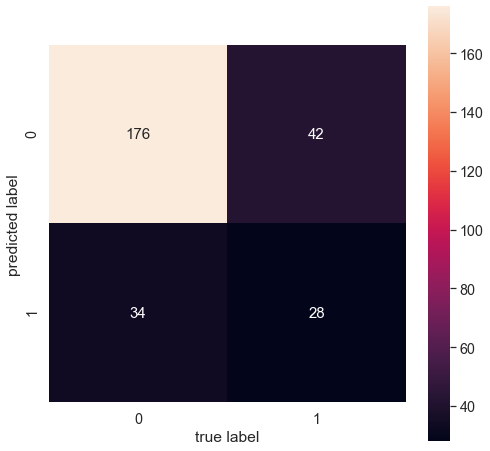

In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, predicted_labels)
sns.set(font_scale=1.3)
sns.heatmap(mat, square=True, annot=True,annot_kws={"size": 15},fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [10]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')

dfc1.Ethnicity = dfc1.Ethnicity.astype(str)
dfc1 = dfc1.loc[dfc1['Ethnicity'] != "nan"]


from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dfc1['Ethnicity'] = labelencoder.fit_transform(dfc1['Ethnicity'])



#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']

y=dfc1['Ethnicity']
X=dfc1.drop(['Ethnicity'],axis=1)

from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE( sampling_strategy='auto',k_neighbors = 1)
sm_X, sm_y= smote.fit_sample(X_train, y_train)

In [30]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .001, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Dense(70, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(11, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(sm_X, pd.get_dummies(sm_y), batch_size=20,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 3000, verbose=1, callbacks=[es,mc])


Train on 1758 samples, validate on 264 samples
Epoch 1/3000
1758/1758 [==============================] - 1s 407us/step - loss: 5.3291 - accuracy: 0.1468 - val_loss: 5.1797 - val_accuracy: 0.3258
Epoch 2/3000
 920/1758 [==============>...............] - ETA: 0s - loss: 5.2381 - accuracy: 0.1598

C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1758/1758 [==============================] - 0s 199us/step - loss: 5.2092 - accuracy: 0.1621 - val_loss: 5.0381 - val_accuracy: 0.3258
Epoch 3/3000
1758/1758 [==============================] - 0s 235us/step - loss: 5.0896 - accuracy: 0.1741 - val_loss: 4.9234 - val_accuracy: 0.3258
Epoch 4/3000
1758/1758 [==============================] - 0s 139us/step - loss: 4.9815 - accuracy: 0.1894 - val_loss: 4.8161 - val_accuracy: 0.3220
Epoch 5/3000
1758/1758 [==============================] - 0s 201us/step - loss: 4.8893 - accuracy: 0.1974 - val_loss: 4.7358 - val_accuracy: 0.3220
Epoch 6/3000
1758/1758 [==============================] - 1s 380us/step - loss: 4.7949 - accuracy: 0.2088 - val_loss: 4.6299 - val_accuracy: 0.3258
Epoch 7/3000
1758/1758 [==============================] - 0s 213us/step - loss: 4.7014 - accuracy: 0.1997 - val_loss: 4.5335 - val_accuracy: 0.3030
Epoch 8/3000
1758/1758 [==============================] - 0s 140us/step - loss: 4.6192 - accuracy: 0.1968 - val_loss: 4.4458 

1758/1758 [==============================] - 0s 204us/step - loss: 2.1396 - accuracy: 0.2554 - val_loss: 2.1760 - val_accuracy: 0.3258
Epoch 113/3000
1758/1758 [==============================] - 0s 223us/step - loss: 2.1333 - accuracy: 0.2537 - val_loss: 2.1792 - val_accuracy: 0.3182
Epoch 114/3000
1758/1758 [==============================] - 0s 250us/step - loss: 2.1328 - accuracy: 0.2611 - val_loss: 2.1716 - val_accuracy: 0.3295
Epoch 115/3000
1758/1758 [==============================] - 0s 232us/step - loss: 2.1307 - accuracy: 0.2565 - val_loss: 2.1664 - val_accuracy: 0.3106
Epoch 116/3000
1758/1758 [==============================] - 0s 236us/step - loss: 2.1292 - accuracy: 0.2491 - val_loss: 2.1649 - val_accuracy: 0.3144
Epoch 117/3000
1758/1758 [==============================] - 0s 164us/step - loss: 2.1212 - accuracy: 0.2486 - val_loss: 2.1653 - val_accuracy: 0.3182
Epoch 118/3000
1758/1758 [==============================] - 0s 189us/step - loss: 2.1232 - accuracy: 0.2565 - val_l

Epoch 221/3000
1758/1758 [==============================] - 0s 251us/step - loss: 2.0024 - accuracy: 0.3242 - val_loss: 2.1703 - val_accuracy: 0.3030
Epoch 222/3000
1758/1758 [==============================] - 0s 245us/step - loss: 2.0033 - accuracy: 0.3248 - val_loss: 2.1842 - val_accuracy: 0.2955
Epoch 223/3000
1758/1758 [==============================] - 0s 261us/step - loss: 2.0088 - accuracy: 0.3259 - val_loss: 2.1797 - val_accuracy: 0.3106
Epoch 224/3000
1758/1758 [==============================] - 0s 201us/step - loss: 2.0048 - accuracy: 0.3305 - val_loss: 2.1829 - val_accuracy: 0.2992
Epoch 225/3000
1758/1758 [==============================] - 0s 189us/step - loss: 1.9910 - accuracy: 0.3328 - val_loss: 2.1823 - val_accuracy: 0.3030
Epoch 226/3000
1758/1758 [==============================] - 0s 82us/step - loss: 1.9951 - accuracy: 0.3328 - val_loss: 2.1899 - val_accuracy: 0.2879
Epoch 227/3000
1758/1758 [==============================] - 0s 71us/step - loss: 1.9933 - accuracy: 0

Epoch 330/3000
1758/1758 [==============================] - 0s 217us/step - loss: 1.9079 - accuracy: 0.3754 - val_loss: 2.2408 - val_accuracy: 0.2841
Epoch 331/3000
1758/1758 [==============================] - 0s 220us/step - loss: 1.9137 - accuracy: 0.3857 - val_loss: 2.2573 - val_accuracy: 0.2879
Epoch 332/3000
1758/1758 [==============================] - 0s 236us/step - loss: 1.9114 - accuracy: 0.3879 - val_loss: 2.2573 - val_accuracy: 0.2879
Epoch 333/3000
1758/1758 [==============================] - 0s 174us/step - loss: 1.9080 - accuracy: 0.3914 - val_loss: 2.2513 - val_accuracy: 0.2879
Epoch 334/3000
1758/1758 [==============================] - 0s 228us/step - loss: 1.9069 - accuracy: 0.3868 - val_loss: 2.2388 - val_accuracy: 0.3068
Epoch 335/3000
1758/1758 [==============================] - 0s 189us/step - loss: 1.9033 - accuracy: 0.3857 - val_loss: 2.2462 - val_accuracy: 0.2879
Epoch 336/3000
1758/1758 [==============================] - 0s 233us/step - loss: 1.9017 - accuracy:

In [31]:
prediction_index=model.predict_classes((X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall
0,0.291667,0.100968,0.102512,0.122614


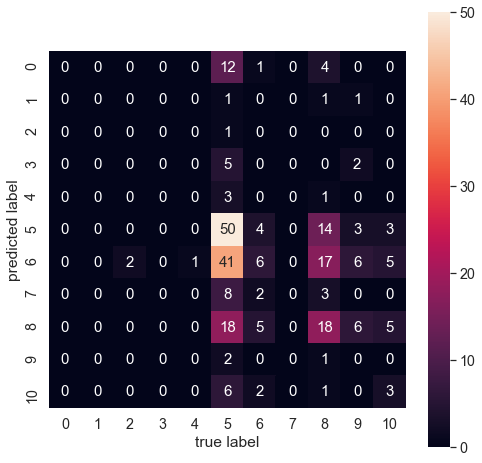

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, predicted_labels)
sns.set(font_scale=1.3)
sns.heatmap(mat, square=True, annot=True,annot_kws={"size": 15},fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [35]:
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')

df.Ethnicity = df.Ethnicity.astype(str)
df= df.loc[df['Ethnicity'] != "nan"]


from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Ethnicity'] = labelencoder.fit_transform(df['Ethnicity'])

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']

y=df['Ethnicity']
X=df.drop(['Ethnicity'],axis=1)

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE(sampling_strategy='auto',k_neighbors = 1)
sm_X, sm_y= smote.fit_sample(X_train, y_train)

In [38]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .001, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Dense(70, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(9, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(sm_X, pd.get_dummies(sm_y), batch_size=20,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 3000, verbose=1, callbacks=[es,mc])


Train on 2212 samples, validate on 280 samples
Epoch 1/3000
2212/2212 [==============================] - 1s 504us/step - loss: 5.0987 - accuracy: 0.1334 - val_loss: 4.8659 - val_accuracy: 0.4536
Epoch 2/3000
1720/2212 [======================>.......] - ETA: 0s - loss: 4.9453 - accuracy: 0.1907

C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


2212/2212 [==============================] - 0s 104us/step - loss: 4.9257 - accuracy: 0.1989 - val_loss: 4.6638 - val_accuracy: 0.4536
Epoch 3/3000
2212/2212 [==============================] - 0s 92us/step - loss: 4.7864 - accuracy: 0.2057 - val_loss: 4.5345 - val_accuracy: 0.4571
Epoch 4/3000
2212/2212 [==============================] - 0s 186us/step - loss: 4.6599 - accuracy: 0.2147 - val_loss: 4.3928 - val_accuracy: 0.4429
Epoch 5/3000
2212/2212 [==============================] - 0s 204us/step - loss: 4.5421 - accuracy: 0.2283 - val_loss: 4.2732 - val_accuracy: 0.4500
Epoch 6/3000
2212/2212 [==============================] - 0s 206us/step - loss: 4.4206 - accuracy: 0.2401 - val_loss: 4.1512 - val_accuracy: 0.4536
Epoch 7/3000
2212/2212 [==============================] - 0s 116us/step - loss: 4.3144 - accuracy: 0.2441 - val_loss: 4.0644 - val_accuracy: 0.4536
Epoch 8/3000
2212/2212 [==============================] - 0s 110us/step - loss: 4.2128 - accuracy: 0.2532 - val_loss: 3.9781 -

2212/2212 [==============================] - 0s 198us/step - loss: 1.9967 - accuracy: 0.3237 - val_loss: 2.0367 - val_accuracy: 0.3714
Epoch 112/3000
2212/2212 [==============================] - 0s 162us/step - loss: 1.9863 - accuracy: 0.3241 - val_loss: 2.0429 - val_accuracy: 0.3679
Epoch 113/3000
2212/2212 [==============================] - 0s 188us/step - loss: 1.9836 - accuracy: 0.3250 - val_loss: 2.0652 - val_accuracy: 0.3214
Epoch 114/3000
2212/2212 [==============================] - 0s 191us/step - loss: 1.9808 - accuracy: 0.3269 - val_loss: 2.0440 - val_accuracy: 0.3929
Epoch 115/3000
2212/2212 [==============================] - 0s 159us/step - loss: 1.9907 - accuracy: 0.3187 - val_loss: 2.0129 - val_accuracy: 0.3964
Epoch 116/3000
2212/2212 [==============================] - 0s 174us/step - loss: 1.9789 - accuracy: 0.3327 - val_loss: 2.0507 - val_accuracy: 0.3607
Epoch 117/3000
2212/2212 [==============================] - 0s 162us/step - loss: 1.9796 - accuracy: 0.3232 - val_l

Epoch 166/3000
2212/2212 [==============================] - 1s 232us/step - loss: 1.9201 - accuracy: 0.3467 - val_loss: 2.0424 - val_accuracy: 0.3536
Epoch 167/3000
2212/2212 [==============================] - 0s 90us/step - loss: 1.9227 - accuracy: 0.3463 - val_loss: 1.9892 - val_accuracy: 0.4500
Epoch 168/3000
2212/2212 [==============================] - 0s 92us/step - loss: 1.9195 - accuracy: 0.3476 - val_loss: 2.0321 - val_accuracy: 0.3357
Epoch 169/3000
2212/2212 [==============================] - 0s 143us/step - loss: 1.9246 - accuracy: 0.3535 - val_loss: 2.0164 - val_accuracy: 0.3929
Epoch 170/3000
2212/2212 [==============================] - 1s 250us/step - loss: 1.9291 - accuracy: 0.3508 - val_loss: 1.9908 - val_accuracy: 0.4143
Epoch 171/3000
2212/2212 [==============================] - 1s 267us/step - loss: 1.9200 - accuracy: 0.3544 - val_loss: 2.0102 - val_accuracy: 0.3571
Epoch 172/3000
2212/2212 [==============================] - 0s 140us/step - loss: 1.9195 - accuracy: 0

Epoch 275/3000
2212/2212 [==============================] - 0s 144us/step - loss: 1.8609 - accuracy: 0.3648 - val_loss: 2.0351 - val_accuracy: 0.3964
Epoch 276/3000
2212/2212 [==============================] - 0s 220us/step - loss: 1.8703 - accuracy: 0.3626 - val_loss: 1.9925 - val_accuracy: 0.4250
Epoch 277/3000
2212/2212 [==============================] - 0s 217us/step - loss: 1.8797 - accuracy: 0.3644 - val_loss: 2.0203 - val_accuracy: 0.4250
Epoch 278/3000
2212/2212 [==============================] - 1s 327us/step - loss: 1.8719 - accuracy: 0.3635 - val_loss: 2.0536 - val_accuracy: 0.3643
Epoch 279/3000
2212/2212 [==============================] - 0s 204us/step - loss: 1.8597 - accuracy: 0.3680 - val_loss: 1.9902 - val_accuracy: 0.4464
Epoch 280/3000
2212/2212 [==============================] - 1s 306us/step - loss: 1.8557 - accuracy: 0.3716 - val_loss: 2.0330 - val_accuracy: 0.3607
Epoch 281/3000
2212/2212 [==============================] - 1s 327us/step - loss: 1.8633 - accuracy:

2212/2212 [==============================] - 0s 185us/step - loss: 1.8550 - accuracy: 0.3910 - val_loss: 2.1193 - val_accuracy: 0.3179
Epoch 384/3000
2212/2212 [==============================] - 0s 179us/step - loss: 1.8451 - accuracy: 0.4033 - val_loss: 2.0531 - val_accuracy: 0.3750
Epoch 385/3000
2212/2212 [==============================] - 1s 297us/step - loss: 1.8320 - accuracy: 0.4155 - val_loss: 2.0486 - val_accuracy: 0.3964
Epoch 386/3000
2212/2212 [==============================] - 1s 273us/step - loss: 1.8333 - accuracy: 0.4173 - val_loss: 1.9893 - val_accuracy: 0.3964
Epoch 387/3000
2212/2212 [==============================] - 1s 281us/step - loss: 1.8357 - accuracy: 0.4019 - val_loss: 2.1174 - val_accuracy: 0.2857
Epoch 388/3000
2212/2212 [==============================] - 0s 120us/step - loss: 1.8438 - accuracy: 0.4037 - val_loss: 2.0869 - val_accuracy: 0.3786
Epoch 389/3000
2212/2212 [==============================] - 0s 122us/step - loss: 1.8355 - accuracy: 0.4100 - val_l

In [39]:
prediction_index=model.predict_classes((X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall
0,0.332143,0.104388,0.101321,0.115351


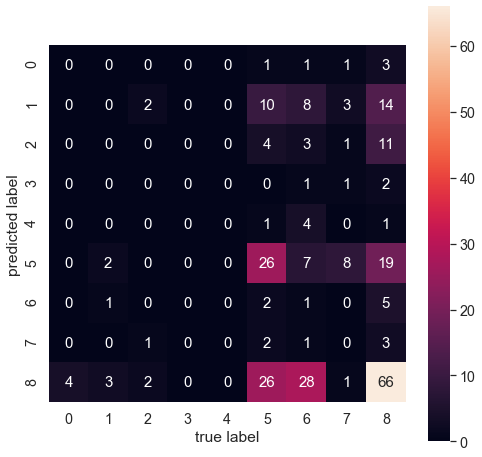

In [40]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, predicted_labels)
sns.set(font_scale=1.3)
sns.heatmap(mat, square=True, annot=True,annot_kws={"size": 15},fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [60]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 60)                780       
_________________________________________________________________
dense_54 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_55 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 122       
Total params: 8,222
Trainable params: 8,222
Non-trainable params: 0
_________________________________________________________________


In [7]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, view=True, filename='network.gv', title="Autism Neural Network")

In [4]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')

df.Ethnicity = df.Ethnicity.astype(str)
df= df.loc[df['Ethnicity'] != "nan"]


from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['Ethnicity'] = labelencoder.fit_transform(df['Ethnicity'])

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']

y=df['Ethnicity']
X=df.drop(['Ethnicity'],axis=1)

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE(sampling_strategy='auto',k_neighbors = 1)
sm_X, sm_y= smote.fit_sample(X_train, y_train)

In [5]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

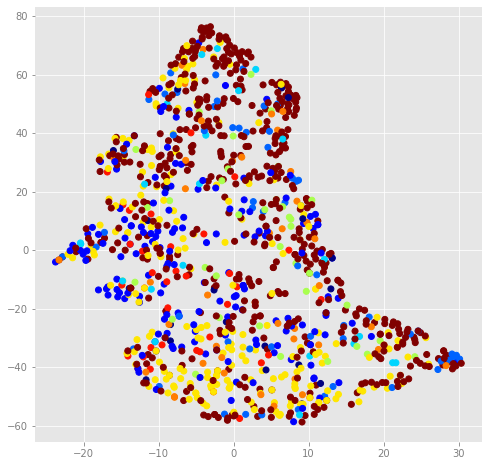

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)

transformed = model.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]

plt.figure(figsize=(8,8))
plt.scatter(xs,ys,c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.show()

In [98]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)

In [104]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=6)

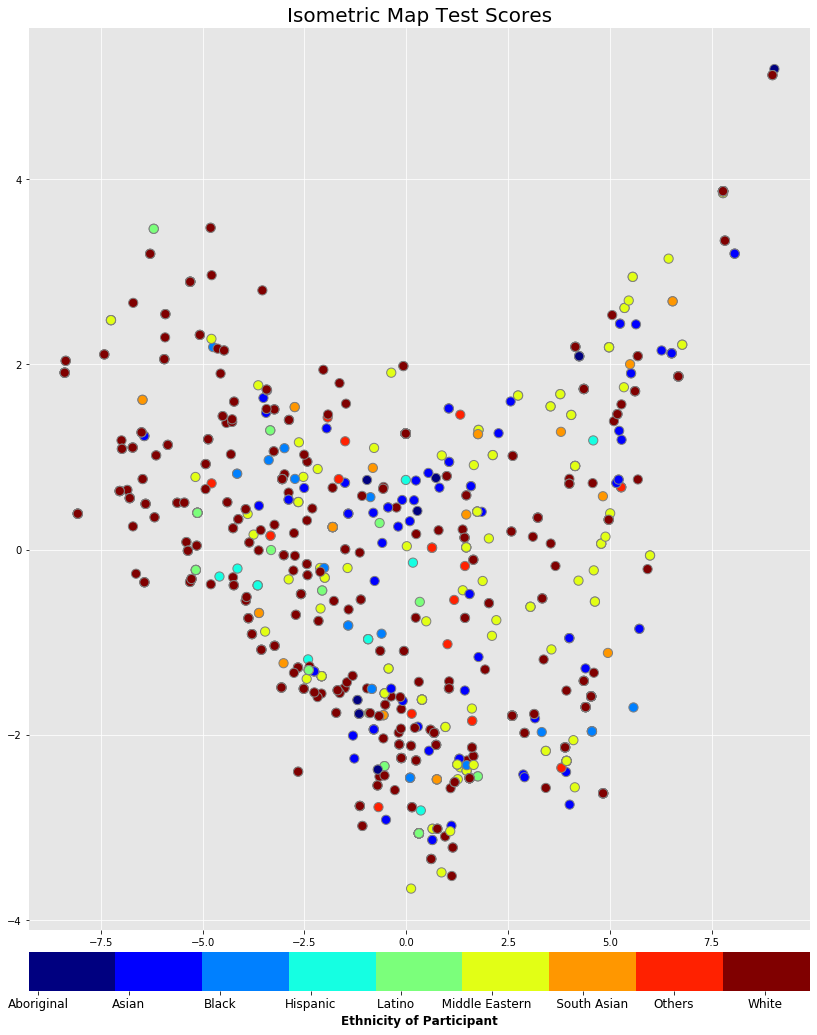

In [106]:
plt.figure(figsize=(14,20))
plt.scatter(proj[:, 0], proj[:, 1], c=y, cmap=plt.cm.get_cmap('jet', 9),edgecolor='grey',s=85)
cbar = plt.colorbar(orientation="horizontal", pad=.02)
plt.clim(-.1,8.5)
cbar.set_ticks(range(9))
cbar.set_ticklabels(['Aboriginal', 'Asian', 'Black', 'Hispanic', 'Latino   ', '  Middle Eastern     ', '     South Asian', 'Others', 'White'])
cbar.ax.tick_params(labelsize='large')
plt.title('Isometric Map Test Scores', fontsize=20)
cbar.set_label(label='Ethnicity of Participant', size='large', weight='bold')

In [8]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']

dfc1.Ethnicity = dfc1.Ethnicity.astype(str)
dfc1 = dfc1.loc[dfc1['Ethnicity'] != "nan"]

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dfc1['Ethnicity'] = labelencoder.fit_transform(dfc1['Ethnicity'])

y=dfc1['Ethnicity']
X=dfc1.drop(['Ethnicity'],axis=1)

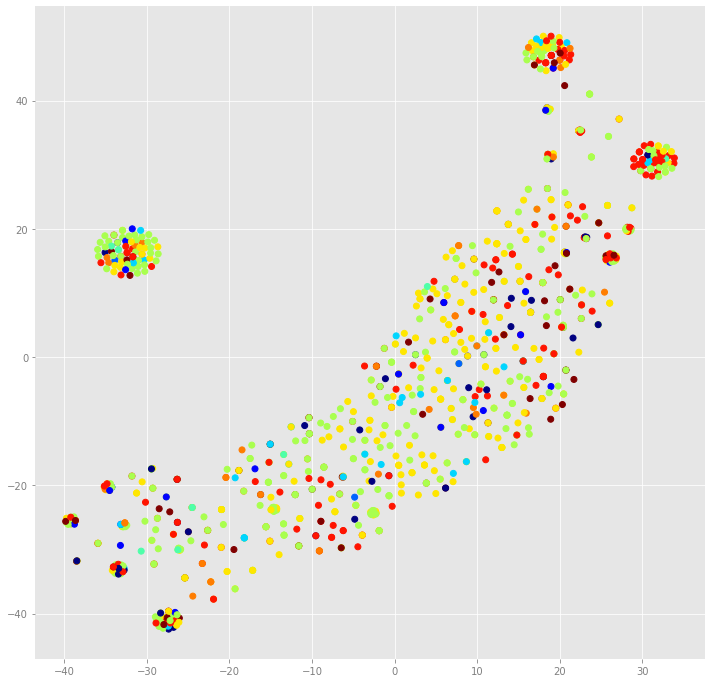

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)

transformed = model.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]

plt.figure(figsize=(12,12))
plt.scatter(xs,ys,c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.show()

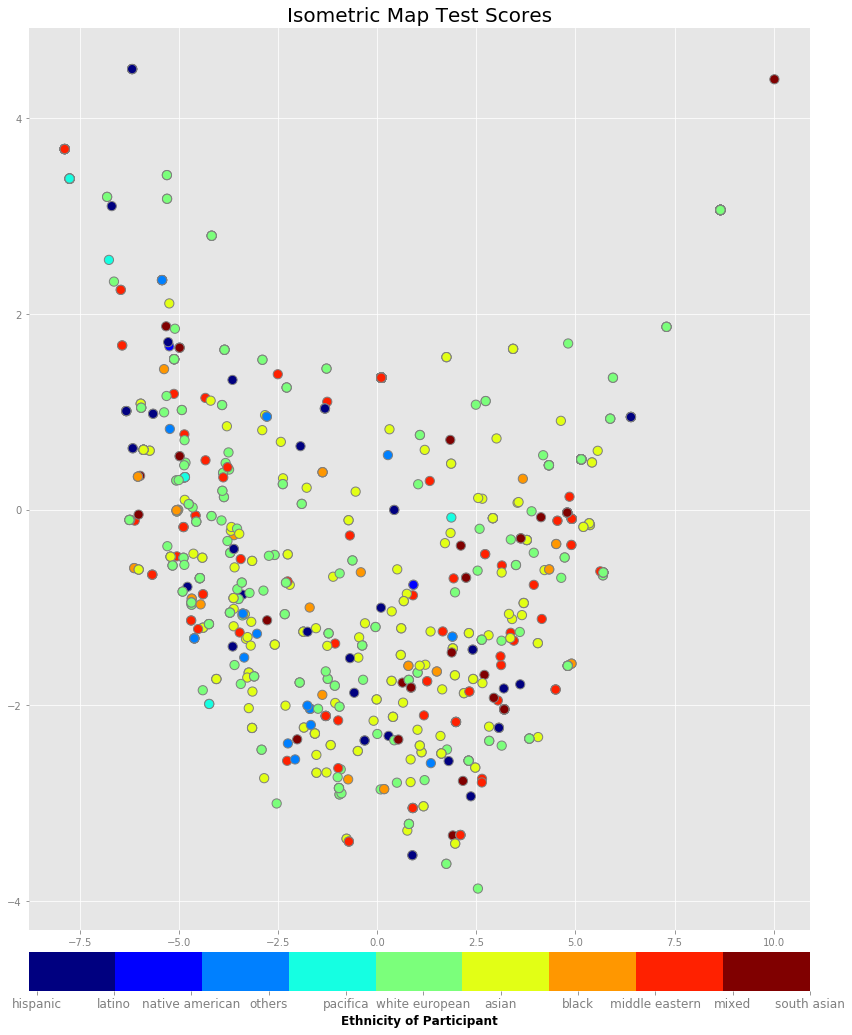

In [14]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)

plt.figure(figsize=(14,20))
plt.scatter(proj[:, 0], proj[:, 1], c=y, cmap=plt.cm.get_cmap('jet', 9),edgecolor='grey',s=85)
cbar = plt.colorbar(orientation="horizontal", pad=.02)
plt.clim(-.1,10)
cbar.set_ticks(range(11))
cbar.set_ticklabels(['hispanic', 'latino', 'native american', 'others', 'pacifica', 'white european',
                     'asian', 'black', 'middle eastern', 'mixed', 'south asian'])
cbar.ax.tick_params(labelsize='large')
plt.title('Isometric Map Test Scores', fontsize=20)
cbar.set_label(label='Ethnicity of Participant', size='large', weight='bold')

In [128]:
ct = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis//Datasets for manipulation new/clusters 1/pythonct.csv")

In [129]:
ct

,Question,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Score
0,Nonwhite,0.688552,0.415824916,0.429292929,0.454545455,0.478114,0.242424242,0.415825,0.651515,0.286195286,0.553872,4.616161616
1,White,0.797710,0.566793893,0.595419847,0.633587786,0.570611,0.419847328,0.475191,0.645038,0.461832061,0.666031,5.832061069
2,T-Value,4.216574,5.091716296,5.620109087,6.098239009,3.101777,6.371449603,1.993907,-0.226095,6.13453319,3.865248,8.081720971
3,P-Value,0.000027,< .00001,< .00001,< .00001,0.001972,< .00001,0.046406,0.821243,< .00001,0.000117,< .00001


In [72]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#recoding for white vs non white and asian cohorts
df['white'] = \
   ((df['Ethnicity'] == "White European") & (df['Sex'] == 'm'))
df.white = dfc1.white.astype(int)


#drop unecesary information
del df['Sex']
del df['Who_completed_the_test']
del df['Ethnicity']
del df['Jaundice']
del df['Family_ASD']
del df['Class']
del df['Age_Mons']
del df['Score']

In [77]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,white
0,0,0,0,0,0,0,1,1,0,1,0
1,1,1,0,0,0,1,1,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,0
3,1,1,1,1,1,1,1,1,1,1,0
4,1,1,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,0
1050,0,0,1,1,1,0,1,0,1,0,0
1051,1,0,1,1,1,1,1,1,1,1,0
1052,1,0,0,0,0,0,0,1,0,1,1


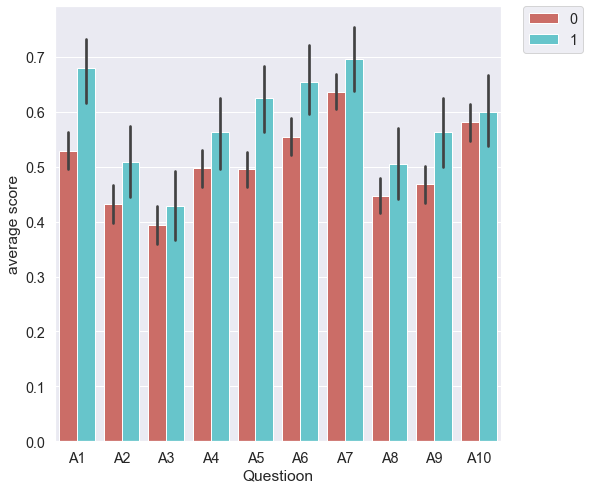

In [123]:
df_long = pd.melt(df, "white", var_name="A", value_name="average score")
plt.figure(figsize=(8,8))
ax = sns.barplot(x="A", hue="white", y="average score", data=df_long,ci=95,palette="hls")
ax.set(xlabel='Questioon', ylabel='average score')
plt.legend(title = "Ethnicity", labels = ['nonwhite','white'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

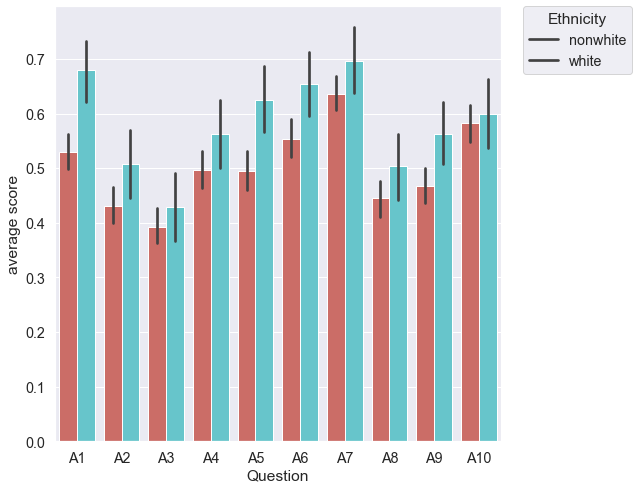

In [125]:
df_long = pd.melt(df, "white", var_name="A", value_name="average score")
plt.figure(figsize=(8,8))
ax = sns.barplot(x="A", hue="white", y="average score", data=df_long,ci=95,palette="hls")
ax.set(xlabel='Question', ylabel='average score')
plt.legend(title = "Ethnicity", labels = ['nonwhite','white'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [31]:
print("Adult Females")
print(round(np.exp(results1.params),3))
print("Adult Males")
print(round(np.exp(results2.params),3))

Adult Females
Intercept                             0.4100
female:C(Ethnicity)[aboriginal]       1.6260
female:C(Ethnicity)[asian]            0.4880
female:C(Ethnicity)[black]            2.8150
female:C(Ethnicity)[hispanic]         2.4390
female:C(Ethnicity)[latino]           3.9030
female:C(Ethnicity)[middle eastern]   0.3440
female:C(Ethnicity)[others ]          2.4390
female:C(Ethnicity)[south asians]     0.1220
female:C(Ethnicity)[white]            2.1060
dtype: float64
Adult Males
Intercept                           0.5490
male:C(Ethnicity)[aboriginal]       0.1820
male:C(Ethnicity)[asian]            0.3110
male:C(Ethnicity)[black]            1.3930
male:C(Ethnicity)[hispanic]         0.9940
male:C(Ethnicity)[latino]           1.6700
male:C(Ethnicity)[middle eastern]   0.2160
male:C(Ethnicity)[others ]          0.4050
male:C(Ethnicity)[south asians]     0.2280
male:C(Ethnicity)[white]            1.2930
dtype: float64


In [30]:
print("Toddler Females")
print(round(np.exp(results3.params),3))
print("Toddler Males")
print(round(np.exp(results4.params),3))

Toddler Females
Intercept                             2.5610
female:C(Ethnicity)[Hispanic]         0.7810
female:C(Ethnicity)[Latino]           0.6830
female:C(Ethnicity)[White European]   0.8750
female:C(Ethnicity)[asian]            1.1950
female:C(Ethnicity)[black]            0.1780
female:C(Ethnicity)[middle eastern]   0.2600
female:C(Ethnicity)[mixed]            1.1720
female:C(Ethnicity)[south asian]      0.5860
dtype: float64
Toddler Males
Intercept                           1.5040
male:C(Ethnicity)[Hispanic]         2.2790
male:C(Ethnicity)[Latino]           4.3210
male:C(Ethnicity)[White European]   2.2360
male:C(Ethnicity)[asian]            1.5200
male:C(Ethnicity)[black]            7.5350
male:C(Ethnicity)[middle eastern]   0.9670
male:C(Ethnicity)[mixed]            0.6650
male:C(Ethnicity)[south asian]      1.1080
dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')


#recoding for white vs non white and asian cohorts
df['white'] = \
  ((df['Ethnicity'] == "white")  & (df['Sex'] == 'm'))
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Ethnicity']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']
del df['Score']


from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

y=df['white']
X=df.drop(['white'],axis=1)

from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE( sampling_strategy='auto')
sm_X, sm_y= smote.fit_sample(X_train, y_train)

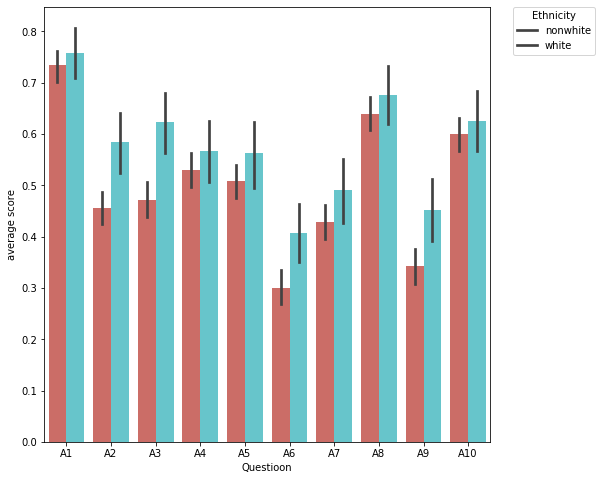

In [7]:
df_long = pd.melt(df, "white", var_name="A", value_name="average score")
plt.figure(figsize=(8,8))
ax = sns.barplot(x="A", hue="white", y="average score", data=df_long,ci=95,palette="hls")
ax.set(xlabel='Questioon', ylabel='average score')
plt.legend(title = "Ethnicity", labels = ['nonwhite','white'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()